Οι βιβλιοθήκες που χρησιμοποιήθηκαν για τον κώδικα είναι οι παρακάτω :

- `spc`: βιβλιοθήκη που επιτρέπει τον χειρισμό αρχείων .spc (FTIR, UV-VIS, διάθλαση X-ray, Φασματοσκοπία μάζας, NMR, Raman φασαμτοσκοπία, φάσμαστα φθορισμού).
- `os`: βιβλιοθήκη που παρέχει συναρτήσεις για την αλληληεπίδραση με το λειτουργικό σύστημα.
- `matplotlib.pyplot`: βιβλιοθήκη που επιτρέπει τη χρήση στατικών, κινούμενων και αλληλεπιδρόντων απεικονίσεων.
- `numpy`: βιβλιοθήκη που χρησιμοποιείται για τη χρήση arrays.
- `pandas`: βιβλιοθήκη που χρησιμοποιείται για τη διαχείρηση δεδομένων και την ανάλυσή τους.
- `functools` : βιβλιοθήκη η οποία είναι για υψηλή τάξης συναρτήσεις, δηλαδή συναρτήσεις που ενεργούν η επιστρέφουν άλλες συναρτήσεις. Το reduce βοηθάει στο να εφαρμοστεί μία συνάρτηση για επανάληψη και να τη μειώσει σε μια συσσωρευμένη τιμή.
- `scipy.optimize`: βιβλιοθήκη που παρέχει συναρτήσεις για ελαχιστοποίηση (ή μεγιστοποίηση) αντικειμενοσυναρτήσεων, συνήθως υποκείμενων σε περιορισμούς. To curve_fit χρησιμοποιείται για την προσαρμογή μιας καμπύλης πάνω στα δεδομένα και την εμφάνιση των βέλτιστων παραμέτρων.

In [1]:
import spc
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dataframe_image as dfi
from functools import reduce
from scipy.optimize import curve_fit

Η παρακάτω συνάρτηση`one_gaussian` χρησιμοποιείται για να δημιουργήσει μια γκαουσιανή κατανομή με δοσμένες τις εξής παραμέτρους :

- `x` : array, περιέχει επιλεγμένους κυματαριθμούς του φάσματος.
- `amp` : int or float, το πλάτος της γκαουσιανής κατανομής.
- `m` : int or float, η κεντρική τιμή της γκαουσιανής κατανομής.
- `FWHM` : int or float, το Full Width at Half Maximum της γκαουσιανής κατανομής.

Έπειτα επιστρέφει ένα *array* που περιέχει τα αποτελέσματα από τους υπολογισμούς.

In [2]:
def one_gaussian(x, amp, m, FWHM):
    """Creates a Gaussian Distribution.
    
    Args:
        x : array
            It contains the selected Wavenumbers of the spectra.
        amp : int or float
            The amplitude of the distribution.
        m : int or float
            The central value of the distribution.
        FWHM : int or float
            The Full Width at Half Maximum of the distribution.
    
    Returns: array
        It contains all the results
        from the calculations of the gaussian equation.
    """
    return ((1. * amp)/(FWHM*(np.sqrt(2.*np.pi))))*np.exp((-1./2.)*(np.power(((x-m)/FWHM), 2.)))

Παράδειγμα χρήσης της `one_gaussian`:

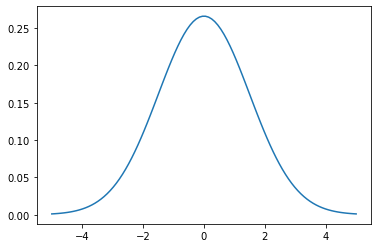

In [3]:
x_example=np.linspace(-5, 5, 100)
g1=one_gaussian(x_example, 1, 0, 1.5)
plt.plot(x_example, g1)

Η παρακάτω συνάρτηση`two_gaussians` χρησιμοποιείται για να δημιουργήσει το άθροισμα δύο γκαουσιανών κατανομών με δοσμένες τις εξής παραμέτρους :

- `x` : array, περιέχει επιλεγμένους κυματαριθμούς του φάσματος.
- `amp1` : int or float, το πλάτος της πρώτης γκαουσιανής κατανομής.
- `m1` : int or float, η κεντρική τιμή της πρώτης γκαουσιανής κατανομής.
- `FWHM1` : int or float, το Full Width at Half Maximum της πρώτης γκαουσιανής κατανομής.
- `amp2` : int or float, το πλάτος της δεύτερης γκαουσιανής κατανομής.
- `m2` : int or float, η κεντρική τιμή της δεύτερης γκαουσιανής κατανομής.
- `FWHM2` : int or float, το Full Width at Half Maximum της δεύτερης γκαουσιανής κατανομής.

Έπειτα επιστρέφει ένα *array* που περιέχει τα αποτελέσματα από τους υπολογισμούς, χρησιμοποιώντας τη βοήθεια της `one_gaussian`.

In [4]:
def two_gaussians(x, amp1, m1, FWHM1, amp2, m2, FWHM2):
    """Creates two Gaussian Distributions.
    
    Args:
        x : array
            It contains the Wavenumbers of the spectra.
        amp1: int or float
            The amplitude of the first distribution.
        m1: int or float
            The central value of the first distribution.
        FWHM1: int or float
            The Full Width at Half Maximum of the first distribution.
        amp2: int or float
            The amplitude of the second distribution.
        m2: int or float
            The central value of the second distribution.
        FWHM2: int or float
            The Full Width at Half Maximum of the second distribution.
            
    Returns: array
        It contains all the results
        from the calculations of the sum of the gaussian equations.
    """ 
    return one_gaussian(x, amp1, m1, FWHM1) + one_gaussian(x, amp2, m2, FWHM2)

Παράδειγμα χρήσης της `two_gaussians`:

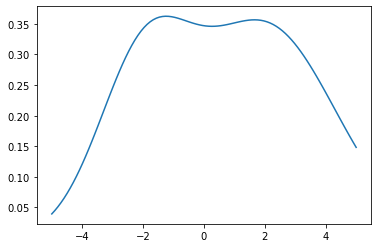

In [5]:
g2=two_gaussians(x_example, 1, -2, 1.5, 2, 2, 2.3)
plt.plot(x_example, g2)

Η παρακάτω συνάρτηση `crop_df` κόβει το dataframe στα επιθυμητά σημεία, για να πάρουμε ένα επιλεγμένο κομμάτι των δεδομένων του. Ως ορίσματα παίρνει :

- `df` : dataframe, το dataframe που θέλουμε να ενεργήσει η συνάρτηση. Θα πρέπει να έχει τη μορφή : index - κυματαριθμοί, columns - δείγματα.
- `x` : int or float, η τιμή από την οποία θα ξεκινήσει η επιλογή των δεδομένων.
- `y` : int or float, η τιμή στην οποία θα σταματήσει η επιλογή των δεδομένων.

Η συνάρτηση στο τέλος θα επιστρέψει :

- `cropped_df` : dataframe, το τελικό dataframe που περιέχει το επιλεγμένο κομμάτι των δεδομένων.

In [6]:
def crop_df(df, x, y):
    """Crops the dataframe.
    
    It is used to crop selected data of the dataframe using loc.
    Doesn't have to put the certain values of the dataframe.
    The loc function finds the closest values in the dataframe.
    
    
    Args:
        df: dataframe
            The initial datafram that needs to be cropped.
            Dataframe must have wavenumbers as index and
            solutions as columns.
        x: int or float
            The value where the function starts the cropping.
        y: int or float
            The value where the function stops the cropping.
            
    Returns: 
        cropped_df: dataframe
            The dataframe of the selected data.
    """
    df=df.sort_index()
    cropped_df=df.loc[x:y,:]
    
    return cropped_df

Παράδειγμα για την `crop_df`:

In [7]:
example_df=pd.DataFrame(x_example, g2)
example_df.columns=['Example']
example_df

,Example
0.039373,-5.00000
0.044949,-4.89899
0.051093,-4.79798
0.057828,-4.69697
0.065169,-4.59596
...,...
0.183495,4.59596
0.174450,4.69697
0.165531,4.79798
0.156766,4.89899


In [8]:
dfi.export(example_df,"example_df.png", max_rows=10)

In [9]:
cropped_example=crop_df(example_df, 0.0, 0.3)
cropped_example

,Example
0.039373,-5.000000
0.044949,-4.898990
0.051093,-4.797980
0.057828,-4.696970
0.065169,-4.595960
0.073127,-4.494949
0.081705,-4.393939
0.090899,-4.292929
0.100696,-4.191919
0.111074,-4.090909


In [10]:
dfi.export(cropped_example,"cropped_example.png", max_rows=10)

Η παρακάτω συνάρτηση `fit_gaussian` κάνει την προσαρμογή (fit) μιας γκαουσιανής καμπύλης πάνω στα επιθυμητά δεδομένα: στην προκειμένη περίπτωση, πάνω στα δεδομένα ενός διαλύματος. Ως παραμέτρους παίρνει τα εξής :

- `df` : dataframe, το επιλεγμένεο dataframe που περιέχει τα δεδομένα (απορρόφηση) για μία συγκέντρωση. Θα πρέπει να έχει τη μορφή : index - κυματαριθμοί, column - δείγμα.
- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers) του φάσματος.
- `amp1` : int or float, το πλάτος της πρώτης γκαουσιανής κατανομής.
- `m1` : int or float, η κεντρική τιμή της πρώτης γκαουσιανής κατανομής.
- `FWHM1` : int or float, το Full Width at Half Maximum της πρώτης γκαουσιανής κατανομής.
- `amp2` : int or float, το πλάτος της δεύτερης γκαουσιανής κατανομής.
- `m2` : int or float, η κεντρική τιμή της δεύτερης γκαουσιανής κατανομής.
- `FWHM2` : int or float, το Full Width at Half Maximum της δεύτερης γκαουσιανής κατανομής.
- `bounds` : 2-tuple of array-like, τα άνω και κάτω όρια των παραμέτρων.

Η προσαρμογή της καμπύλης (fit) επιστρέφει τα εξής :

- `popt` : array, οι βέλτιστες παράμετροι που προέκυψαν από την προσαρμογή, για κάθε καμπύλη (amp1, m1, FWHM1, amp2, m2, FWHM2). 
- `pcov` : 2-D array, οι εκτιμώμενες συνδιακυμάνσεις που προέκυψαν από την προσαρμογή.

In [11]:
def fit_gaussian(df, x, amp1, m1, FWHM1, amp2, m2, FWHM2, bounds):
    """Fitting one curve with a single gaussian.
    
    Is used for the fitting of the data from one single spectrum, 
    and it is fitted with the help of the function two_gaussians.
    
    Args:
        df: dataframe
            It contains the data of a single solution.
            Dataframe must have wavenumbers as index and
            the solution as column.
        x: array
            X can only be the Wavenumbers of the spectrum.
        amp1: int or float
            The amplitude of the first distribution.
        m1: int or float
            The central value of the first distribution.
        FWHM1: int or float
            The Full Width at Half Maximum of the first distribution.
        amp2: int or float
            The amplitude of the second distribution.
        m2: int or float
            The central value of the second distribution.
        FWHM2: int or float
            The Full Width at Half Maximum of the second distribution.   
        bounds: 2-tuple of array-like 
            These are the bounds of the fit.
    
    Returns: 
        popt: array
            The optimal values of amp1, m1, FWHM1, 
            amp2, m2, FWHM2 (amplitude, central value 
            and Full Width at Half Maximum of each gaussian) 
        pcov: 2-D array
            The estimated covariance of popt. 
            The diagonals provide the variance of the parameter estimate. 
    """
    p0=(amp1, m1, FWHM1, amp2, m2, FWHM2)
    popt, pcov=curve_fit(two_gaussians, x, df, p0, bounds=bounds)
    
    return popt, pcov

Παράδειγμα `fit_gaussian`:

In [12]:
x_example_df=cropped_example.index
bounds_example=((0, 0, 0, 0, 0, 0), (10, 10, 5, 5, 5, 5))
fit_gaussian(cropped_example['Example'], x_example_df, 9, 7, 1.5, 5, 5, 2.3, bounds_example)

(array([3.99616748, 7.02939023, 0.3480212 , 0.15583214, 0.22833107,
        0.04405776]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.09220177e-33, -1.13241962e-33,
          4.95273201e-18, -4.54542835e-20,  1.57126480e-18],
        [ 0.00000000e+00, -1.13241962e-33,  1.48836355e-33,
         -5.72208785e-18, -7.40911040e-19, -1.48863553e-18],
        [ 0.00000000e+00,  4.95273201e-18, -5.72208785e-18,
          2.52840007e-02,  3.34129389e-04,  5.70878716e-03],
        [ 0.00000000e+00, -4.54542835e-20, -7.40911040e-19,
          3.34129389e-04,  2.48025062e-03,  2.04218369e-04],
        [ 0.00000000e+00,  1.57126480e-18, -1.48863553e-18,
          5.70878716e-03,  2.04218369e-04,  3.09346101e-03]]))

Η παρακάτω συνάρτηση `all_fit_distribution` κάνει την προσαρμογή μιας γκαουσιανής ή λορεντζιανής καμπύλης για *όλα τα διαλύματα του πειράματος*. Ως παραμέτρους παίρνει :

- `df` : dataframe, το οποίο περιέχει όλα τα δεδομένα από τα φάσματα. Θα πρέπει να έχει τη μορφή : index - κυματαριθμοί, columns - δείγματα.
- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers).
- `amp1` : int or float, το πλάτος της πρώτης κατανομής.
- `m1` : int or float, η κεντρική τιμή της πρώτης κατανομής.
- `FWHM1` : int or float, το Full Width at Half Maximum της πρώτης κατανομής.
- `amp2` : int or float, το πλάτος της δεύτερης κατανομής.
- `m2` : int or float, η κεντρική τιμή της δεύτερης κατανομής.
- `FWHM2` : int or float, το Full Width at Half Maximum της δεύτερης κατανομής.
- `bounds` : 2-tuple of array-like, τα άνω και κάτω όρια των παραμέτρων.
- `distribution` : string (default 'gauss'), ο τύπος της κατανομής. Μπορεί να γίνει και η επιλογή 'lorentz'.

Η προσαρμογή της καμπύλης (fit) για κάθε διάλυμα ξεχωριστά επιστρέφει :

- `list_of_parameters` : list, περιέχει κάθε popt (βέλτιστες παραμέτρους) και pcov (εκτιμώμεμενες συνδιακυμάνσεις) για κάθε διάλυμα ξεχωριστά. 

In [13]:
def all_fit_distribution(df, x, amp1, m1, FWHM1, amp2, m2, FWHM2, bounds, distribution='gauss'):
    """Fitting all the curves with gaussian or lorentzian curves.
    
    Is used when we have a dataframe of the spectra of different solutions,
    to fit them and show their parameters.
    
     Args:
        df: dataframe
            It contains the data of all the different solutions.
            Dataframe must have wavenumbers as index and
            solutions as columns.
        x: array
            X can only be the Wavenumbers of the spectrum.
        amp1: int or float
            The amplitude of the first distribution.
        m1: int or float
            The central value of the first distribution.
        FWHM1: int or float
            The Full Width at Half Maximum of the first distribution.
        amp2: int or float
            The amplitude of the second distribution.
        m2: int or float
            The central value of the second distribution.
        FWHM2: int or float
            The Full Width at Half Maximum of the second distribution.
        bounds: 2-tuple of array-like
            These are the bounds of the fit.
    
    Kwargs:
         distribution: string, default 'gauss'.
            The distribution can also be 'lorentz'.
    
    Returns: 
        list_of_parameters: list of arrays
            It is the list that contains all the parameters of all
            the different solutions.
     """
    columns=list(df)
    list_of_parameters=[]
    
    if distribution == 'gauss':
       
        for name in columns :
            concentration=df[name]
            parameters=fit_gaussian(concentration, x, amp1, m1, FWHM1, amp2, m2, FWHM2, bounds=bounds)
            list_of_parameters.append(parameters)
    
    if distribution == 'lorentz':
        
        for name in columns :
            concentration=df[name]
            parameters=fit_lorentzian(concentration, x, amp1, m1, FWHM1, amp2, m2, FWHM2, bounds=bounds)
            list_of_parameters.append(parameters)
    
    
    return list_of_parameters   

Η παρακάτω συνάρτηση `fit_parameters` χρησιμοποιείται για να ομαδοποιήσει τις παραμέτρους από μία προσαρμογή (fit) σε ένα dataframe για να είναι πιο εμφανή τα αποτελέσματα. Ως παραμέτρους παίρνει :

- `solution` : string, η τιμή της συγκέντρωσης του διαλύματος που θα χρησιμοποιηθεί ως τίτλος του dataframe
- `popt` : array, οι βέλτιστες παράμετροι που προέκυψαν από την προσαρμογή, για κάθε καμπύλη (amp1, m1, FWHM1, amp2, m2, FWHM2). 
- `pcov` : 2-D array, οι εκτιμώμενες συνδιακυμάνσεις που προέκυψαν από την προσαρμογή.

Η συνάρτηση στο τέλος επιστρέφει :

- `fit_parameters_df` : dataframe, το προκύπτον dataframe που περιέχει τις βέλτιστες παραμέτρους για κάθε κορυφή ξεχωριστά (Η2Ο, D2O), αλλά και τα σφάλματα (perr) που υπολογίστηκαν με τη βοηθεια του pcov. 

In [14]:
def fit_parameters(solution, popt, pcov):
    """Returns the parameters of the fit of one solution.
    
    It displays the optimum values of the fitting of the curve,
    as a dataframe.
    The errors have been calculated with the help of the 
    perr = np.sqrt(np.diag(pcov))
    
    Kwargs:
        solution: string
            The name of the solution which will be the name
            of the column of the dataframe.
    Args: 
        popt: array
            The optimal values of amp1, m1, FWHM1, 
            amp2, m2, FWHM2 (amplitude, central value 
            and Full Width at Half Maximum of each gaussian) 
        pcov: 2-D array
            The estimated covariance of popt. 
            The diagonals provide the variance of the parameter estimate. 
    
    Returns: 
        fit_parameters_df : dataframe
            The dataframe that contains all the parameters.
    """

    perr = np.sqrt(np.diag(pcov))   
    
    parameters_water = {solution : ('H20', popt[0], popt[1], popt[2], perr[0], perr[1], perr[2])}
    parameters_HDO = {solution : ('HDO', popt[3], popt[4], popt[5], perr[3], perr[4], perr[5])}
    
    parameters_water_df=pd.DataFrame.from_dict(parameters_water)
    parameters_HDO_df=pd.DataFrame.from_dict(parameters_HDO)
    
    
    parameters_water_df.index=['Substance1', 'Amplitude1', 'Center1', 'FWHM1', 'Amplitude1 error', 'Center1 error', 'FWHM1 error']
    parameters_HDO_df.index=['Substance2', 'Amplitude2', 'Center2', 'FWHM2', 'Amplitude2 error', 'Center2 error', 'FWHM2 error']
    
    all_parameters_df=[parameters_water_df, parameters_HDO_df]
    fit_parameters_df=pd.concat(all_parameters_df)
    
    return fit_parameters_df

Παράδειγμα χρήσης της `fit_parameters`:

In [15]:
fit_example=fit_gaussian(cropped_example['Example'], x_example_df, 9, 7, 1.5, 5, 5, 2.3, bounds_example)
popt_example=fit_example[0]
pcov_example=fit_example[1]

parameters_example=fit_parameters('Example', popt_example, pcov_example)
parameters_example.drop(index=['Substance1', 'Substance2'])

,Example
Amplitude1,3.99617
Center1,7.02939
FWHM1,0.348021
Amplitude1 error,0
Center1 error,3.30485e-17
FWHM1 error,3.85793e-17
Amplitude2,0.155832
Center2,0.228331
FWHM2,0.0440578
Amplitude2 error,0.159009


In [16]:
dfi.export(parameters_example.drop(index=['Substance1', 'Substance2']),"mytable.png")

Η παρακάτω συνάρτηση `all_fit_parameters` χρησιμοποιείται για να ομαδοποιήσει όλα τα αποτελέσματα και σφάλματα της προσαρμογής (fit) κάθε καμπύλης. Τα ορίσματα είναι :

- `df` : dataframe, το οποίο περιέχει όλα τα δεδομένα από τα φάσματα. Η μορφή που θα πρέπει να έχει είναι : index-κυματαριθμοί και columns-δείγματα.
- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers).
- `amp1` : int or float, το πλάτος της πρώτης κατανομής.
- `m1` : int or float, η κεντρική τιμή της πρώτης κατανομής.
- `FWHM1` : int or float, το Full Width at Half Maximum της πρώτης κατανομής.
- `amp2` : int or float, το πλάτος της δεύτερης κατανομής.
- `m2` : int or float, η κεντρική τιμή της δεύτερης κατανομής.
- `FWHM2` : int or float, το Full Width at Half Maximum της δεύτερης κατανομής.
- `bounds` : 2-tuple of array-like, τα άνω και κάτω όρια των παραμέτρων.
- `distribution` : string (default 'gauss'), ο τύπος της κατανομής. Μπορεί να γίνει και η επιλογή για 'lorentz'.

Στο τέλος επιστρέφει :

- `all_parameters_df` : dataframe, το οποίο περιέχει ομαδοποιημένα όλα τα αποτελέσματα από κάθε προσρμογή για κάθε συγκέντρωση του διαλύματος.

In [17]:
 def all_fit_parameters(df, x, amp1, m1, FWHM1, amp2, m2, FWHM2, bounds, distribution='gauss'):
    """Returns the parameters of the fit of all solutions.
    
    Is used to show the values and errors of all the fitted curves,
    of all the concentrations that are used in the experiment, in 
    one dataframe.
    
    Args:
        df: dataframe
            It contains the data of all the different solutions.
            The dataframe must have the wavenumbers as index and
            the solutions as columns.
        x: array
            X can only be the Wavenumbers of the spectrum.
        amp1: int or float
            The amplitude of the first distribution.
        m1: int or float
            The central value of the first distribution.
        FWHM1: int or float
            The Full Width at Half Maximum of the first distribution.
        amp2: int or float
            The amplitude of the second distribution.
        m2: int or float
            The central value of the second distribution.
        FWHM2: int or float
            The Full Width at Half Maximum of the second distribution.
        bounds: bool
            Τhese are the bounds of the fit.
    Kwargs:
        distribution: string, default 'gauss'
            The distribution can also be 'lorentz'.
   
   Returns: 
        all_parameters_df : dataframe
        The result of the concatanation of all the previous
        datframes that are accesed by the function fit_parameters.
    """
    concentrations=list(df)
    parameters_df=[]
    
    if distribution == 'gauss':
        all_fit_parameters=all_fit_distribution(df, x, amp1, m1, FWHM1, amp2, m2, FWHM2, bounds=bounds)
    
    if distribution == 'lorentz':
        all_fit_parameters=all_fit_distribution(df, x, amp1, m1, FWHM1, amp2, m2, FWHM2, bounds=bounds, distribution='lorentz')
        
    
    for set_of_parameters in all_fit_parameters:
        
        popt=set_of_parameters[0]
        pcov=set_of_parameters[1]
        
        all_parameters=fit_parameters('', popt, pcov)
        parameters_df.append(all_parameters)
        
        
    all_parameters_df=pd.concat(parameters_df, axis=1)
    all_parameters_df.columns=concentrations
    
    return all_parameters_df

Η παρακάτω συνάρτηση `first_peak_results` χρησιμοποιείται για να εμφανίσει το αποτέλεσμα της κατανομής για το H2O. Τα ορίσματα που παίρνει είναι τα εξής :

- `concentration` : string, η συγκέντρωση του διαλύματος, τις παραμέτρους του οποίου χρησιμοποιούμε για να εμφανίσουμε την γκαουσιανή κατανομή.
- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers).
- `popt` : array, οι βέλτιστες παράμετροι που προέκυψαν από την προσαρμογή (amp1, m1, FWHM1). 
- `distribution` : string (default 'gauss'), ο τύπος της κατανομής. Μπορεί να γίνει και επιλογή για 'lorentz'.

Στο τέλος η συνάρτηση θα επιστρέψει :

- `results_df` : dataframe, περιέχει τα αποτέλεσματα του υπολογισμού της κατανομής.

In [18]:
def first_peak_results(concentration, x, popt, distribution='gauss'):
    """The distribution of the first peak.
    
    It is used to show the the results of the fit 
    of the first peak of the water in a dafataframe.
    
    Args:
        concentration: string
            The name of the concentration that is used to show
            the results of the first distribution.
        x: array
            X can only be the Wavenumbers of the spectrum.
        popt: array
            The optimal values of amp1, m1, FWHM1(amplitude, central value 
            and Full Width at Half Maximum of first ditribution) 
    Kwargs:
        distribution: string, default 'gauss'
            The distribution can also be 'lorentz'.
    
    Returns:
        results_df: dataframe
            The dataframe that contains the results of the 
            first ditribution.
    """
    if distribution == 'gauss':   
        results=one_gaussian(x, popt[0], popt[1], popt[2])
        
    if distribution == 'lorentz':
        results=one_lorentzian(x, popt[0], popt[1], popt[2])
    
    results_df=pd.DataFrame(results)
    results_df.columns=[concentration + ', H2O']
    
    return results_df

Η παρακάτω συνάρτηση `all_first_peak_results` ομαδοποιεί όλα τα αποτελέσματα για την καμπύλη του Η2Ο χρησιμοποιώντας την προηγούμενη συνάρτηση `first_peak_results`. Τα ορίσματα είναι τα εξής :

- `solutions_names`: list of strings, περιέχει τα ονόματα των διαλυμάτων που χρησιμοποιήθηκαν.
- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers).
- `list_of_parameters` : list, περιέχει όλες τις παραμέτρους που έχουν προέλθει από την προσαρμογή και είναι η λίστα που επιστρέφει η συνάρτηση `all_fit_parameters`
- `distribution` : string (default 'gauss'), ο τύπος της κατανομής. Μπορεί να γίνει και η επιλογή 'lorentz'.

Και στο τέλος επιστρέφει :

- `all_results_df` : dataframe, περιέχει όλα τα αποτελέσματα για την καμπύλη του H2O για κάθε διάλυμα του πειράματος 

In [19]:
def all_first_peak_results(solutions_names, x, list_of_parameters, distribution='gauss'):
    """First peak's results of all solutions.
    
    Is used to show in a dataframe all of the results
    of the distribution of the first peak of
    each solution.
    
    Args:
        solutions_names: list of strings
            The names of the used solutions.
        x: array
            X can only be the Wavenumbers of the spectrum.
        list_of_parameters: list of arrays
            Contains the optimal values and the covariances
            of each distribution of the fitted curve.
    Kwargs:
        distribution: string, default 'gauss'
            The distribution can also be 'lorentz'.
            
    Returns:
        all_results_df: dataframe
            Contains all the results of the distributions
            of the first peak of each solution.
        """
    all_results=[]
    
    if distribution == 'gauss':
    
        for set_of_parameters in list_of_parameters :
        
            results=first_peak_results('', x, set_of_parameters[0])
            all_results.append(results)
    
    if distribution == 'lorentz':
    
        for set_of_parameters in list_of_parameters :
        
            results=first_peak_results('', x, set_of_parameters[0], distribution='lorentz')
            all_results.append(results)
        
    all_results_df=pd.concat(all_results, axis=1)
    all_results_df.columns=solutions_names
        
    return all_results_df

Η παρακάτω συνάρτηση `second_peak_results` χρησιμοποιείται για να εμφανίσει το αποτέλεσμα της κατανομής για το HDO. Τα ορίσματα που παίρνει είναι τα εξής :

- `solution` : string, η συγκέντρωση του διαλύματος, τις παραμέτρους του οποίου χρησιμοποιούμε για να εμφανίσουμε την κατανομή.
- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers).
- `popt` : array, οι βέλτιστες παράμετροι που προέκυψαν από την προσαρμογή (amp2, m2, FWHM2). 
- `distribution` : string (default 'gauss'), ο τύπος της κατανομής. Μπορεί να γίνει και η επιλογή για 'lorentz'.

Στο τέλος η συνάρτηση θα επιστρέψει :

- `results_df` : dataframe, περιέχει τα αποτέλεσματα του υπολογισμού της κατανομής.

In [20]:
def second_peak_results(solution, x, popt, distribution='gauss'):
    """The distribution of the second peak.
    
    It is used to show the the results of the fit
    of the second peak of HDO in a dafataframe.
    
    Args:
        solution: string
            The name of the concentration that is used to show
            the results of the second distribution.
        x: array
            X can only be the Wavenumbers of the spectrum.
        popt: array
            The optimal values of amp2, m2, FWHM2(amplitude, central value 
            and Full Width at Half Maximum of second gaussian) 
    Kwargs:
        distribution: string, default 'gauss'
            The distribution can also be chosen to be 'lorentz'.
    
    Returns:
        results_df: dataframe
            The dataframe that contains the results of the 
            second ditribution.
    """
    if distribution == 'gauss':
        results=one_gaussian(x, popt[3], popt[4], popt[5])
    
    if distribution == 'lorentz':
        results=one_lorentzian(x, popt[3], popt[4], popt[5])
    
    results_df=pd.DataFrame(results)
    results_df.columns=[solution + ', HDO']
    
    return results_df

Η παρακάτω συνάρτηση `all_second_peak_results` ομαδοποιεί όλα τα αποτελέσματα για την καμπύλη του ΗDΟ χρησιμοποιώντας την προηγούμενη συνάρτηση `second_peak_results`. Τα ορίσματα είναι τα εξής :

- `solutions_names`: list of strings, περιέχει τα ονόματα των διαλυμάτων που χρησιμοποιήθηκαν.
- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers).
- `list_of_parameters` : list, περιέχει όλες τις παραμέτρους που έχουν προέλθει από την προσαρμογή και είναι η λίστα που επιστρέφει η συνάρτηση `all_fit_parameters`
- `distribution` : string (default 'gauss'), ο τύπος της κατανομής. Μπορεί να γίνει και η επιλογή για 'lorentz'.

Και στο τέλος επιστρέφει :

- `all_results_df` : dataframe, περιέχει όλα τα αποτελέσματα για την καμπύλη του HDO για κάθε διάλυμα του πειράματος 

In [21]:
def all_second_peak_results(solutions_names, x, list_of_parameters, distribution='gauss'):
    """Second peak's results of all solutions.
    
    Is used to show in a dataframe all of the results
    of the distribution of the second peak of
    each solution.
     
    Args:
        solutions_names: list of strings
            The names of the used solutions.
        x: array
            X can only be the Wavenumbers of the spectrum.
        list_of_parameters: list of arrays
            Contains the optimal values and the covariances
            of each distribution of the fitted curve.
            
    Kwargs:
        distribution: string, default 'gauss'
            The distribution can also be 'lorentz'.          
    Returns:
        all_results_df: dataframe
            Contains all the results of the distributions
            of the second peak of each solution.
        """
    all_results=[]
    
    if distribution == 'gauss':
        
        for set_of_parameters in list_of_parameters :
        
            results=second_peak_results('', x, set_of_parameters[0])
            all_results.append(results)
            
    if distribution == 'lorentz':
    
        for set_of_parameters in list_of_parameters :
        
            results=second_peak_results('', x, set_of_parameters[0], distribution='lorentz')
            all_results.append(results)
    
    all_results_df=pd.concat(all_results, axis=1)
    all_results_df.columns=solutions_names
    
    return all_results_df

Η παρακάτω συνάρτηση `plot_one_fit` χρησιμοποιείται για να σχεδιαστεί η προσαρμογή (fit) ενός διαλύματος. Οι παράμετροι που δέχεται είναι :

- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers).
- `popt` : array, οι βέλτιστες παράμετροι που προέκυψαν από την προσαρμογή, για τη συγκεκριμένη καμπύλη (amp1, m1, FWHM1, amp2, m2, FWHM2). 
- `distribution` : string (default 'gauss'), ο τύπος της κατανομής. Μπορεί να γίνει και η επιλογή για 'lorentz'.
- `figsize` : (float, float), το μέγεθος της γραφικής παράστασης.
- `title` : string (default None), ο τίτλος του γραφήματος.
- `invert_xaxis` : bool (default False), αντιστροφή του άξονα x.
- `legend` : string (default None), το υπόμνημα της γραφικής παράστασης.
- `grid` : bool (default False), εμφάνιση πλέγματος στη γραφική παράσταση.
- `marker` : string (default None), το στυλ της καμπύλης.
- `color` : string (default None), το χρώμα της καμπύλης.

Στο τέλος θα επιστρέψει :

- `fig` : figure, η γραφική παράσταση.
- `ax` : ax, οι άξονες της γραφικής παράστασης.

In [22]:
def plot_one_fit(x,
                 popt,
                 figsize,
                 distribution='gauss',
                 title=None,
                 invert_xaxis=False,
                 legend=None,
                 grid=False,
                 marker=None,
                 color=None
                 ):
    """Plotting the curve of one fit.
    
    It uses the returned popt array of the function
    fit_gaussian or the fit_lorentzian 
    and creates the subplot.
    
    Args:
        x: array
            X can only contain the Wavenumbers of the spectrum.
        popt: array
            The optimal values of amp1, m1, FWHM1, 
            amp2, m2, FWHM2 (amplitude, central value 
            and Full Width at Half Maximum of each gaussian)      
        figsize: (float, float)
            The size of the figure.
    Kwargs:
        distribution: string, default 'gauss'
            The distribution can also be 'lorentz'.
        title: string, default None
            The title of the figure.
            When None there is no title on the figure.
        invert_xaxis: bool, default False
            The xaxis is inverted only when it is True.
        legend: string, default None
            When None there is no legend on the figure.
        grid: bool, default False
            When True the figure has a grid.
        marker: string, default None
            It is a simple line if None, else it can be
            assigned the valid symbol from the official 
            table at https://matplotlib.org/stable/_modules/matplotlib/markers.html
        color: string, default None
            It is light blue if None, else it can be 
            assigned the valid symbol or string from
            https://het.as.utexas.edu/HET/Software/Matplotlib/api/colors_api.html.
    Returns:
        fig: the figure of the plot
        ax: the ax of the subplot
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    if distribution == 'gauss':
        if marker==marker:
            if color==color:
                 ax.plot(x, two_gaussians(x, *popt), marker=marker, color=color)
        
            elif color is None:
                 ax.plot(x, two_gaussians(x, *popt), marker=marker)
        else:
            ax.plot(x, two_gaussians(x, *popt))
    
    if distribution == 'lorentz':
        if marker==marker:
            if color==color:
                ax.plot(x, two_lorentzians(x, *popt), marker=marker, color=color)
        
            elif color is None:
            
                ax.plot(x, two_lorentzians(x, *popt), marker=marker)
        else:
            ax.plot(x, two_lorentzians(x, *popt))
            
    if invert_xaxis is True:
        ax.invert_xaxis()
    
    if title==title:
        ax.title.set_text(title)
    
    if legend==legend:
        ax.legend([legend], loc='upper left')
   
    if grid is True:
        ax.grid()
        
    ax.set_xlabel('Wavenumber [1/cm]')
    ax.set_ylabel('Absorbance')
    
    
    return fig, ax

Η παρακάτω συνάρτηση `plot_all_fit` σχεδιάζει τις προσαρμογές (fit) από κάθε καμπύλη και τις εμφανίζει μαζί για να φανεί η διαφορά στη καμπύλη του HDO. Οι παράμετροι που παίρνει είναι :

- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers).
- `solutions_names` : list of strings, τα ονόματα των διαλυμάτων του πειράματος.
- `all_parameters_df` : dataframe, περιέχει τις βέλτιστες παραμέτρους και τα σφάλματα για κάθε διάλυμα ξεχωριστά.
- `distribution` : string (default 'gauss'), ο τύπος της κατανομής. Μπορεί να γίνει η επιλογή και για 'lorentz'.
- `title` : string (default None), ο τίτλος του γραφήματος.
- `invert_xaxis` : bool (default False), αντιστροφή του άξονα x.
- `grid` : bool (default False), εμφάνιση πλέγματος στη γραφική παράσταση.

Ενώ προσθέσει κάθε άξονα στον πρωταρχικό, στο τέλος θα επιστρέψει :

- `ax` : ax, οι άξονες της γραφικής παράστασης.

In [23]:
def plot_all_fit(x,
                 solutions_names,
                 all_parameters_df,
                 distribution='gauss',
                 title=None,
                 invert_xaxis=False,
                 grid=False,
                ):
    """Plotting of all the fit curves in a single graph.
    
    It is used to plot all the different fit curves from 
    the dataframe of the optimal parameters of the fit(popt) 
    of each fit (each column contains
    the parameters of each different solution).
    
    Args:
        x: array
            X can only contain the Wavenumbers of the spectrum.
        solutions_names: list of strings
            The names of the solutions of the experiment.
        all_parameters_df: dataframe
            The dataframe that contains the selected data
            we want to plot.
    Kwargs:
        distribution: string, default 'gauss'
            The selected distribution can also be 
            'lorentz'.
        title: string, default None
            The title of the figure.
            When None there is no title on the figure.
        invert_xaxis: bool, default False
            The xaxis is inverted only when it is True.
        grid: bool, default False
            When True the figure has a grid.
            
    Returns: ax
            The ax of the plot.
    """

    columns=list(all_parameters_df)
    
    popt_all=[]    
    for name in columns :
        
        popt1=all_parameters_df.loc['Amplitude1', name]
        popt2=all_parameters_df.loc['Center1', name]
        popt3=all_parameters_df.loc['FWHM1', name]
        popt4=all_parameters_df.loc['Amplitude2', name]
        popt5=all_parameters_df.loc['Center2', name]
        popt6=all_parameters_df.loc['FWHM2', name]
        
        popt=[popt1, popt2, popt3, popt4, popt5, popt6]
   
        popt_all.append(popt)
    
    if distribution == 'gauss' :
        ax=plot_one_fit(x,
                        popt_all[0],
                        figsize=(8,8),
                        distribution='gauss',
                        title=None,
                        invert_xaxis=False,
                        legend=None,
                        grid=False,
                        marker=None,
                        color=None)[1]
    
        for optimum_parameters in popt_all[1:]:  
            ax.plot(x, two_gaussians(x, *optimum_parameters))
            ax.legend(solutions_names, loc='upper left')
        
    if distribution == 'lorentz' :
        ax=plot_one_fit(x,
                        popt_all[0],
                        figsize=(8,8),
                        distribution='lorentz',
                        title=None,
                        invert_xaxis=False,
                        legend=None,
                        grid=False,
                        marker=None,
                        color=None)[1]
    
        for optimum_parameters in popt_all[1:]:  
            ax.plot(x, two_lorentzians(x, *optimum_parameters)) 
            ax.legend(solutions_names, loc='upper left')
    
    if title==title:
        ax.title.set_text(title)
        
    if grid is True:
        ax.grid()
        
    if invert_xaxis is True:
        ax.invert_xaxis()    
    
    return ax

Η παρακάτω συνάρτηση `check_residuals` ελέγχει την ποιότητα της προσαρμογής (fit) που έχει γίνει. Ως ορίσματα παίρνει :

- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers).
- `original_df` : dataframe, το αρχικό dataframe, στο οποίο κάναμε την προσαρμογή της καμπύλης.
- `popt_fit` : array, περιέχει τις βέλτιστες παραμέτρους της προσαρμογής.
- `distribution` : string (by default 'gauss'), ο τύπος της κατανομής. Μπορεί να γίνει και η επιλογή για 'lorentz'.

Επιστρέφει :

- `fig` : figure, η γραφική παράσταση.
- `ax` : ax, οι άξονες της γραφικής παράστασης.

In [24]:
def check_residuals(x, original_df, popt_fit, distribution='gauss'):
    """Checks the quality of one fit curve.
    
    It is used to substract the fit curve from the 
    original curve, plot them together (ax[0]) and then plot
    the residuals(ax[1]).
    
        Args:
            x: array
                X can only contain the Wavenumbers of the spectrum.
            original_df: dataframe
                The dataframe that contains the original data.
            popt_fit: array
                Contains the parameters of the popt of the fit.
        Kwargs:
           distribution: string, by default 'gauss'
             The distribution can also be 'lorentz'.
        Returns: 
            fig: the figure of the plot
            ax: the ax of the subplot
    """
    if distribution == 'gauss':   
        fit_df=two_gaussians(x, *popt_fit)
        residual_results=original_df-fit_df
    
    if distribution == 'lorentz':
        fit_df=two_lorentzians(x, *popt_fit)
        residual_results=original_df-fit_df
    
    fig, ax = plt.subplots(2, figsize=[10,8])
    ax[0].plot(x, original_df, x, fit_df)
    ax[0].invert_xaxis
    ax[0].set_xlabel('Wavenumber [1/cm]')
    ax[0].set_ylabel('Absorbance')
    ax[1].plot(x, residual_results)
    ax[1].set_xlabel('Wavenumber [1/cm]')
    ax[1].set_ylabel('Residuals')
    ax[1].invert_xaxis
    
    return fig, ax

Η παρακάτω συνάρτηση `show_residuals_results` παρουσιάζει τα αποτελέσματα του ελέγχου της ποιότητας της προσαρμογής (fit) που έχει γίνει. Ως ορίσματα παίρνει :

- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers).
- `original_df` : dataframe, το αρχικό dataframe, στο οποίο κάναμε την προσαρμογή της καμπύλης.
- `popt_fit` : array, περιέχει τις βέλτιστες παραμέτρους της προσαρμογής.
- `distribution` : string (by default 'gauss'), ο τύπος της κατανομής. Μπορεί να γίνει και η επιλογή για 'lorentz'.

Επιστρέφει :

- `dataframe_with_results` : dataframe, περιέχει τα αποτελέσματα του ελέγχου ποιότητας

In [32]:
def show_residual_results(x, original_df, popt_fit, distribution='gauss'):
    """Shows the results of the quality of one fit curve.
    
    It is used to substract the fit curve from the 
    original curve and turn them into a dataframe.
    
        Args:
            x: array
                X can only contain the Wavenumbers of the spectrum.
            original_df: dataframe
                The dataframe that contains the original data.
            popt_fit: array
                Contains the parameters of the popt of the fit.
        Kwargs:
           distribution: string, by default 'gauss'
             The distribution can also be 'lorentz'.
        Returns: 
            dataframe_with_results: df,
                Contains the results of the residuals
    """   
    if distribution == 'gauss':   
        fit_df=two_gaussians(x, *popt_fit)
        residual_results=original_df-fit_df
        dataframe_with_results = pd.DataFrame(residual_results)
    
    if distribution == 'lorentz':
        fit_df=two_lorentzians(x, *popt_fit)
        residual_results=original_df-fit_df
        dataframe_with_results = pd.DataFrame(residual_results)
    
    return dataframe_with_results

Η παρακάτω συνάρτηση `plot_fit_each_peak` σχεδιάζει την καμπύλη που προκύπτει από τα αρχικά δεδομένα, την προσαρμογή (fit) και τις δύο κατανομές που προκύπτουν μετά την προσαρμογή. Ως ορίσματα παίρνει :

- `concentration` : string, το διάλυμα συγκεκριμένης συγκέντρωσης, τα δεδομένα του οποίου θέλουμε να χρησιμοποιήσουμε.
- `x` : array, οι τιμές του x μπορούν να είναι μόνο οι κυματαριθμοί (Wavenumbers).
- `popt` : array, περιέχει τις βέλτιστες παραμέτρους της προσαρμογής.
- `original_df` : dataframe, το αρχικό dataframe, στο οποίο κάναμε την προσρμογή της καμπύλης.
- `distribution` : string (default 'gauss'), ο τύπος της κατανομής. Μπορεί να γίνει και επιλογή για 'lorentz'.
- `title` : string (default None), ο τίτλος του γραφήματος.
- `invert_xaxis` : bool (default False), αντιστροφή του άξονα x.
- `legend` : string (default None), το υπόμνημα της γραφικής παράστασης.
- `grid` : bool (default False), εμφάνιση πλέγματος στη γραφική παράσταση.
- `colors`: list, τα χρώματα των διαφορετικών καμπυλών.
- `xlabel`: bool (default False), το όνομα του άξονα x.
- `ylabel`: bool (default False), το όνομα του άξονα y.

Στο τέλος επιστρέφει :

- `fig` : figure, η γραφική παράσταση.
- `ax` : ax, οι άξονες της γραφικής παράστασης.

In [33]:
def plot_fit_each_peak(concentration, 
                       x, 
                       popt, 
                       original_df,
                       distribution='gauss',
                       title=None,
                       invert_xaxis=False,
                       legend=None,
                       grid=False,
                       colors=list,
                       xlabel=False,
                       ylabel=False
                      ):
    """Plots the fit and each peak.
    
    Args:
        concentration: string
            The concentration of the solution.
         x: array
            X can only contain the Wavenumbers of the spectrum.
        popt: array
            Contains the parameters of the popt of the fit.
        original_df: dataframe
            Contains the original data we took during the experiment.
    Kwargs:
        distribution: string, default 'gauss'
            The distribution can also be chosen to be
            'lorentz'.
        title: string, default None
            The title of the figure.
            When None there is no title on the figure.
        invert_xaxis: bool, default False
            The xaxis is inverted only when it is True.
        legend: string, default None
            When None there is no legend on the figure.
        grid: bool, default False
            When True the figure has a grid.
        colors: list of strings
            Contains the different colors for each curve.
            The colors must be valid according to the table:
            https://het.as.utexas.edu/HET/Software/Matplotlib/api/colors_api.html.
        xlabel: string, default False.
            The label of the x axis of the figure.
        ylabel: string, default False.
            The label of the y axis of the fiigure.
    Returns: 
            fig: the figure of the plot
            ax: the ax of the subplot
    """
    if distribution == 'gauss':
        first_peak=first_peak_results(concentration, x, popt)
        second_peak=second_peak_results(concentration, x, popt)
    
    if distribution == 'lorentz':
        first_peak=first_peak_results(concentration, x, popt, distribution='lorentz')
        second_peak=second_peak_results(concentration, x, popt, distribution='lorentz')
    
    fig, ax=plt.subplots(figsize=(10,8))
    
  
    if colors is None:
        ax.plot(x, original_df)
        ax.plot(x, first_peak)
        ax.plot(x, second_peak)
        
        if distribution == 'gauss':
            ax.plot(x, two_gaussians(x, *popt))
        if distribution == 'lorentz':
            ax.plot(x, two_lorentzians(x, *popt))
        
        if legend==legend:
            ax.legend(legend, loc='upper right')
            
            
    elif colors==colors:
        ax.plot(x, original_df, colors[0])
        ax.plot(x, first_peak, colors[1])
        ax.plot(x, second_peak, colors[2])
        
        if distribution == 'gauss':
            ax.plot(x, two_gaussians(x, *popt), colors[3])
        if distribution == 'lorentz':
            ax.plot(x, two_lorentzians(x, *popt), colors[3])
        
        if legend==legend:
            ax.legend(legend, loc='upper right')
    
    
    if title==title:
        ax.title.set_text(title)
        
    if grid is True:
        ax.grid()
        
    if invert_xaxis is True:
        ax.invert_xaxis()
   
    if xlabel==xlabel:
        ax.set_xlabel(xlabel)
    
    if ylabel==ylabel:
        ax.set_ylabel(ylabel)
    

    return fig, ax

Η παρακάτω συνάρτηση `line` παράγει μια γραμμή σύμφωνα με την εξίσωση. Ως παράμετρους παίρνει:

- `x`: array, η ανεξάρτητη μεταβλητή x.
- `a`: int or float, κλίση της ευθείας.
- `b`: int or float, σημείο από όπου ξεκινάει η ευθεία.

Έπειτα επιστρέφει ένα *array* με τους υπολογισμούς.

In [34]:
def line(x, a, b):
    """ Creates a line.
    
    Args:
        x: array
            The independent x variable.
        a: int or float
            The slope of the line.
        b: int or float
            The point that the line begins.
            
    Returns: array
            The results from the calculations
    """
    return a * x + b

Η παρακάτω συνάρτηση `one_lorentzian` παραγει μια λορεντζιανή κατανομή και ως ορίσματα παίρνει τα παρακάτω:

- `x`: array, περιλαμβάνει επιλεγμένους κυματαριθμούς του φάσματος.
- `amp`: int or float, το πλάτος της κατανομής.
- `m`: int or float, η κεντρική τιμή της κατανομής.
- `FWHM`: int or float, το Full Width at Half Maximum της κατανομής.

Μετά επιστρέφει το *array* με τους υπολογισμούς.

In [35]:
def one_lorentzian(x, amp, m, FWHM):
    """Creates a lorentzian distribution.
    
    Args:
        x : array
            It contains the selected Wavenumbers of the spectra.
        amp : int or float
            The amplitude of the distribution.
        m : int or float
            The central value of the distribution.
        FWHM : int or float
            The FWHM of the distribution.
    
    Returns: array
        It contains all the results
        from the calculations of the lorentzian equation.
    """
    return  (amp * (FWHM**2)) / ( (FWHM**2) + ( x - m )**2)

Η παρακάτω συνάρτηση `two_lorentzians` παραγει δύο λορεντζιανές κατανομές και ως ορίσματα παίρνει τα παρακάτω:

- `x`: array, περιλαμβάνει επιλεγμένους κυματαριθμούς του φάσματος.
- `amp1`: int or float, το πλάτος της πρώτης λορεντζιανής κατανομής.
- `m1`: int or float, η κεντρική τιμή της πρώτης λορεντζιανής κατανομής.
- `FWHM1`: int or float, το Full Width at Half Maximum της πρώτης λορεντζιανής κατανομής.
- `amp2`: int or float, το πλάτος της δεύτερης λορεντζιανής κατανομής.
- `m2`: int or float, η κεντρική τιμή της δεύτερης λορεντζιανής κατανομής.
- `FWHM2`: int or float, το Full Width at Half Maximum της δεύτερης λορεντζιανής κατανομής.

Μετά επιστρέφει το `array` με τους υπολογισμούς.

In [36]:
def two_lorentzians(x, amp1, m1, FWHM1, amp2, m2, FWHM2):
    """Creates a lorentzian distribution.
    
    Args:
        x : array
            It contains the selected Wavenumbers of the spectra.
        amp1 : int or float
            The amplitude of the first lorentzian distribution.
        m1 : int or float
            The central value of the first lorentzian distribution.
        FWHM1 : int or float
            The FWHM of the first lorentzian distribution.
        amp2 : int or float
            The amplitude of the second lorentzian distribution.
        m2 : int or float
            The central value of the second lorentzian distribution.
        FWHM2 : int or float
            The FWHM of the second lorentzian distribution.
    Returns: array
        It contains all the results
        from the calculations of the sum of the lorentzian equations.
    """     
    return one_lorentzian(x, amp1, m1, FWHM1) + one_lorentzian(x, amp2, m2, FWHM2)

Το παρακάτω είναι παράδειγμα χρήσης των συναρτήσεων `one_lorentzian` και `two_lorentzian`:

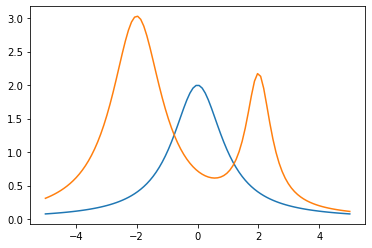

In [37]:
lor1=one_lorentzian(x_example, 2, 0, 1)
lor2=two_lorentzians(x_example, 3, -2, 1, 2, 2, 0.5)
plt.plot(x_example, lor1, x_example, lor2)

Η παρακάτω συνάρτηση `fit_lorentzian` κάνει την προσαρμογή (fit) μιας λορεντζιανής κατανομής πάνω σε ένα διάλυμα. Τα ορίσματά του είναι τα εξής :

- `df`: dataframe, περιλαμβάνει τα δεδομένα ενός διαλύματος. Θα πρέπει να έχει τη μορφή : index-κυματαριθμοί και columns-δείγματα.
- `x`: array, περιλαμβάνει επιλεγμένους κυματαριθμούς του φάσματος.
- `amp1`: int or float, το πλάτος της πρώτης λορεντζιανής κατανομής.
- `m1`: int or float, η κεντρική τιμή της πρώτης λορεντζιανής κατανομής.
- `FWHM1`: int or float, το Full Width at Half Maximum της πρώτης λορεντζιανής κατανομής.
- `amp2`: int or float, το πλάτος της δεύτερης λορεντζιανής κατανομής.
- `m2`: int or float, η κεντρική τιμή της δεύτερης λορεντζιανής κατανομής.
- `FWHM2`: int or float, το Full Width at Half Maximum της δεύτερης λορεντζιανής κατανομής.
- `bounds` : 2-tuple of array-like, τα άνω και κάτω όρια των παραμέτρων.

Μετά την προσαρμογή επιστρέφει:

- `popt` : array, οι βέλτιστες παράμετροι που προέκυψαν από την προσαρμογή, για κάθε καμπύλη (amp1, m1, FWHM1, amp2, m2, FWHM2). 
- `pcov` : 2-D array, οι εκτιμώμενες συνδιακυμάνσεις που προέκυψαν από την προσαρμογή.

In [38]:
def fit_lorentzian(df, x, amp1, m1, FWHM1, amp2, m2, FWHM2, bounds):
    """Fitting one curve with a single lorentzian
    
    Is used for the fitting of the data from one single spectrum, 
    and it is fitted with the help of the function two_lorentzians.
    
    Args:
        df: dataframe
            It contains the data of all the different solutions.
            Must have the wavenumbers as index and the solutions
            as columns.
        x : array
            It contains the selected Wavenumbers of the spectra.
        amp1 : int or float
            The amplitude of the first lorentzian distribution.
        m1 : int or float
            The central value of the first lorentzian distribution.
        FWHM1 : int or float
            The FWHM of the first lorentzian distribution.
        amp2 : int or float
            The amplitude of the second lorentzian distribution.
        m2 : int or float
            The central value of the second lorentzian distribution.
        FWHM2 : int or float
            The FWHM of the second lorentzian distribution.    
        bounds: 2-tuple of array-like
            These are the bounds of the fit.
    
    Returns: 
        popt: array
            The optimal values of amp1, m1, gama1, 
            amp2, m2, gama2 (amplitude, central value 
            and FWHM of each lorentzian) 
        pcov: 2-D array
            The estimated covariance of popt. 
            The diagonals provide the variance of the parameter estimate. 
    """
    p0=(amp1, m1, FWHM1, amp2, m2, FWHM2)
    popt, pcov=curve_fit(two_lorentzians, x, df, p0, bounds=bounds)
    
    return popt, pcov

- Διαβάζονται όλα τα *.spc* αρχεία (αρχεία που περιέχουν τα φάσματα) και καταγράφονται τα αποτέλεσματα σε *.csv* αρχεία.
- Διαβάζονται όλα τα *.csv* αρχεία και τοποθετούνται μέσα στη λίστα `dataframes` για ομαδοποίηση και καλύτερη επεξεργασία.

In [39]:
filenames=['H2O', '100ppm', '200ppm', '400ppm', '600ppm','800ppm1', '800ppm2', '1000ppm', '1500ppm', '2000ppm', '3000ppm']
dataframes=[]


if not os.path.isdir('csv_files/'):
    os.mkdir('csv_files/')

for filename in filenames :
    k=spc.File('FTIR/' + filename + '.spc')
    k.write_file('csv_files/' + filename + '.csv')
    


for filename in filenames :
    dataframes.append(pd.read_csv(
    'csv_files/' + filename  + '.csv',
    sep='\t',
    names=['Wavenumber [1/cm]', 'Absorbance'],
    header=None
    ))      

gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)


Γίνεται συγχώνευση όλων των dataframe σε ένα χρησιμοποιώντας μια `lambda` συνάρτηση και τη λίστα `dataframes`.

In [40]:
merged_df=reduce(lambda x,y: pd.merge(x,y,
                                  on=['Wavenumber [1/cm]']
                                  ), dataframes)
merged_df=merged_df.set_index('Wavenumber [1/cm]')
merged_df.columns=['H2O', '100ppm', '200ppm', '400ppm', '600ppm','800ppm1', '800ppm2', '1000ppm', '1500ppm', '2000ppm', '3000ppm']

merged_df

,H2O,100ppm,200ppm,400ppm,600ppm,800ppm1,800ppm2,1000ppm,1500ppm,2000ppm,3000ppm
Wavenumber [1/cm],,,,,,,,,,,
3998.502514,0.408313,0.407638,0.407158,0.408706,0.408172,0.406700,0.408552,0.407174,0.408001,0.406712,0.408053
3994.772568,0.413473,0.412812,0.412241,0.413858,0.413341,0.411848,0.413720,0.412328,0.413155,0.411826,0.413280
3991.042621,0.417651,0.416966,0.416408,0.418095,0.417523,0.416102,0.417933,0.416522,0.417352,0.416039,0.417585
3987.312675,0.421960,0.421241,0.420805,0.422507,0.421822,0.420458,0.422309,0.420907,0.421767,0.420430,0.421904
3983.582728,0.425127,0.424374,0.423936,0.425666,0.425075,0.423542,0.425519,0.424084,0.424956,0.423556,0.425061
...,...,...,...,...,...,...,...,...,...,...,...
663.930455,5.000000,3.158505,3.307515,4.053896,3.742823,3.146710,3.316350,5.000000,4.552378,3.163290,2.968283
660.200508,5.000000,3.293489,3.261610,5.000000,5.000000,3.323322,5.000000,5.000000,5.000000,5.000000,4.093561
656.470562,5.000000,2.978711,2.984391,2.958026,2.998771,2.919315,5.000000,5.000000,5.000000,5.000000,5.000000


Γίνεται ο σχεδιασμός όλων των φασμάτων σε μια γραφική παράσταση για να είναι εμφανείς οι καμπύλες που θα μελετήθούν.

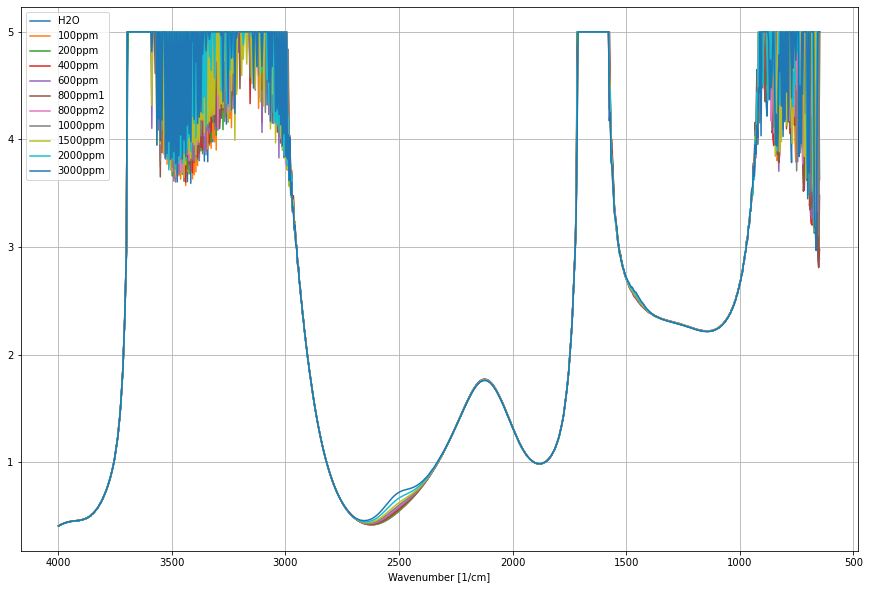

In [41]:
merged_df.plot(figsize=[15,10])
plt.gca().invert_xaxis()
plt.grid()

Το παραπάνω `dataframe` κόβεται στα σημεία που μας ενδιαφέρουν, στην μεσαία περιοχή του υπεριώδους.<br>
Αυτά τα σημεία είναι από 1900 έως 2600 [1/cm].<br>
Τα παραπάνω γίνονται με τη βοήθεια της συνάρτησης `crop_df`.

In [42]:
data_df=crop_df(merged_df, 1900, 2600)
data_df

,H2O,100ppm,200ppm,400ppm,600ppm,800ppm1,800ppm2,1000ppm,1500ppm,2000ppm,3000ppm
Wavenumber [1/cm],,,,,,,,,,,
1902.272651,0.994134,0.993972,0.995375,0.995877,0.995762,0.994829,0.995524,0.995602,0.996057,0.995311,0.996623
1906.002598,0.998826,0.998705,1.000044,1.000520,1.000366,0.999466,1.000166,1.000233,1.000734,0.999958,1.001257
1909.732544,1.003312,1.003196,1.004441,1.005051,1.004931,1.003898,1.004642,1.004679,1.005145,1.004365,1.005639
1913.462490,1.009342,1.009085,1.010393,1.011109,1.010953,1.009874,1.010607,1.010638,1.011100,1.010234,1.011479
1917.192437,1.015138,1.014851,1.016078,1.016881,1.016725,1.015614,1.016262,1.016394,1.016859,1.015807,1.017155
...,...,...,...,...,...,...,...,...,...,...,...
2584.852838,0.430853,0.432936,0.436361,0.443244,0.450857,0.457163,0.457994,0.464447,0.477560,0.501865,0.533789
2588.582784,0.428175,0.430070,0.433387,0.439896,0.447050,0.452932,0.453805,0.459882,0.472281,0.495254,0.525551
2592.312731,0.426074,0.427817,0.430990,0.437180,0.443896,0.449376,0.450288,0.455957,0.467766,0.489378,0.518067


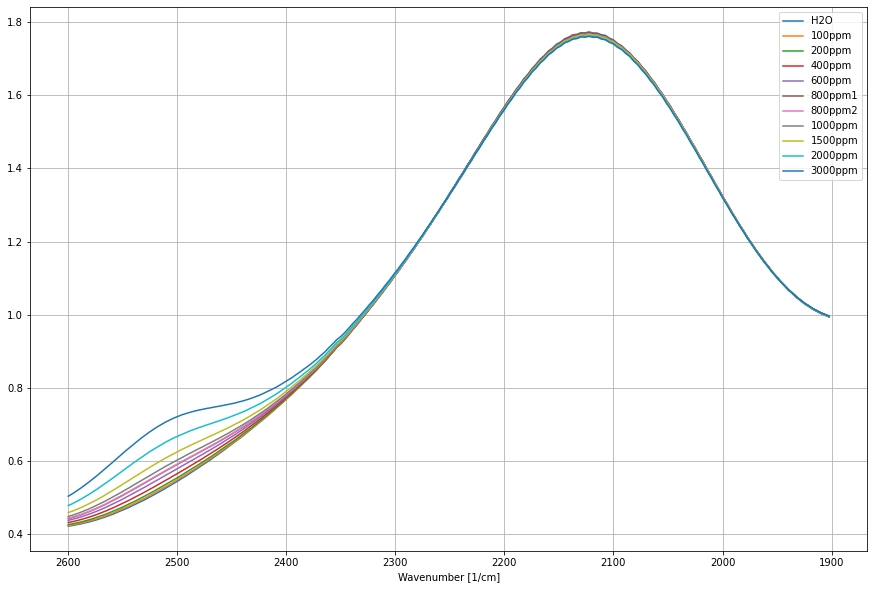

In [44]:
data_df.plot(figsize=[15,10])
plt.gca().invert_xaxis()
plt.grid()

<h3>Gaussian Fit</h3>

Παράδειγμα προσαρμογής καμπύλης για ένα συγκεκριμένο διάλυμα, εκείνο των 1000ppm.<br>
Τα αποτελέσματα του fit (`popt`, `pcov`) αποθηκεύονται στην παράμετρο `parameters`.

In [45]:
bounds=(( 0, 2050, 0, 0, 2450, 0), ( np.inf, 2150, 200, np.inf, 2550, 200))


data1=data_df['1000ppm']
xtest=data1.index

parameters=fit_gaussian(data1, xtest, 780, 2100, 180, 130, 2500, 120, bounds)
parameters

(array([ 785.08002054, 2119.19201088,  182.46938727,  130.9778921 ,
        2529.02414339,  122.06347908]),
 array([[ 76.03978451,  11.03477234,  18.28493926, -79.6144101 ,
          15.68354621, -54.82017183],
        [ 11.03477234,   2.50129944,   2.58159764, -14.01154569,
           2.18598745, -10.15694927],
        [ 18.28493926,   2.58159764,   4.70067605, -18.79220934,
           4.30898238, -12.49574319],
        [-79.6144101 , -14.01154569, -18.79220934, 105.48768283,
          -2.51102691,  77.18775332],
        [ 15.68354621,   2.18598745,   4.30898238,  -2.51102691,
          21.94400232,   2.30484399],
        [-54.82017183, -10.15694927, -12.49574319,  77.18775332,
           2.30484399,  60.46053573]]))

Χρησιμοπιώντας τη συνάρτηση `fit_parameters` εμφανίζονται οι βέλτιστες παράμετροι και τα σφάλματα για το συγκεκριμένο fit.

In [46]:
popt=parameters[0]
pcov=parameters[1]
fit_parameters('1000ppm', popt, pcov)

,1000ppm
Substance1,H20
Amplitude1,785.08
Center1,2119.19
FWHM1,182.469
Amplitude1 error,8.72008
Center1 error,1.58155
FWHM1 error,2.1681
Substance2,HDO
Amplitude2,130.978
Center2,2529.02


Χρησιμοποιώντας τη συνάρτηση `all_fit_distribution` γίνετα προσαρμογή της γκαουσιανής καμπύλης πάνω σε όλα τα διαφορετικά φάσματα και επιστρέφεται η λίστα με τις βέλτιστες παραμέτρους και τις εκτιμώμενες συνδιακυμάνσεις για κάθε διάλυμα ξεχωριστά.

In [47]:
xtest1=data_df.index
list_all_parameters=all_fit_distribution(data_df, xtest1, 780, 2100, 180, 130, 2500, 120, bounds)
list_all_parameters

[(array([ 783.42832117, 2118.98999035,  181.76586308,  124.92562102,
         2531.75192297,  131.67694958]),
  array([[ 122.53410434,   20.20089692,   27.48008456, -139.1140842 ,
            31.73062954, -108.79963757],
         [  20.20089692,    4.36692501,    4.3999446 ,  -26.08320131,
             4.93581403,  -21.15125009],
         [  27.48008456,    4.3999446 ,    6.51296109,  -30.33426244,
             8.11213849,  -22.99498911],
         [-139.1140842 ,  -26.08320131,  -30.33426244,  189.62833251,
           -11.61463832,  155.58437046],
         [  31.73062954,    4.93581403,    8.11213849,  -11.61463832,
            43.1697726 ,   -1.89398693],
         [-108.79963757,  -21.15125009,  -22.99498911,  155.58437046,
            -1.89398693,  134.08495913]])),
 (array([ 782.93503293, 2118.88265852,  181.85606645,  125.19454974,
         2531.42493221,  130.73108403]),
  array([[ 116.06190114,   18.92718   ,   26.25838682, -130.74159114,
            29.48443306, -101.24519129],


Χρησιμοποιώντας τη συνάρτηση `all_fit_parameters` γίνεται η ομαδοποίση όλων των βέλτιστων παραμέτρων (`popt`) και σφαλμάτων (`perr`) για κάθε διάλυμα ξεχωριστά, σε ένα dataframe.

In [48]:
parameters_for_plot=all_fit_parameters(data_df, xtest1, 780, 2100, 180, 130, 2500, 120, bounds)
parameters_for_plot

,H2O,100ppm,200ppm,400ppm,600ppm,800ppm1,800ppm2,1000ppm,1500ppm,2000ppm,3000ppm
Substance1,H20,H20,H20,H20,H20,H20,H20,H20,H20,H20,H20
Amplitude1,783.428,782.935,783.847,784.477,784.623,784.261,784.632,785.08,786.306,787.276,790.398
Center1,2118.99,2118.88,2118.88,2118.91,2118.99,2119.13,2119.08,2119.19,2119.43,2119.86,2120.38
FWHM1,181.766,181.856,181.974,182.117,182.239,182.296,182.325,182.469,182.727,183.243,184.031
Amplitude1 error,11.0695,10.7732,10.5097,10.0601,9.51703,9.07233,9.08023,8.72008,8.1784,7.32306,6.62263
Center1 error,2.08972,2.02636,1.96643,1.86789,1.75122,1.65781,1.65842,1.58155,1.46643,1.29097,1.14898
FWHM1 error,2.55205,2.50679,2.46472,2.39189,2.30285,2.22889,2.22951,2.1681,2.07274,1.91881,1.78602
Substance2,HDO,HDO,HDO,HDO,HDO,HDO,HDO,HDO,HDO,HDO,HDO
Amplitude2,124.926,125.195,125.735,127.116,128.496,129.57,129.867,130.978,133.542,138.211,144.629
Center2,2531.75,2531.42,2531.24,2530.8,2530.08,2529.42,2529.49,2529.02,2528.29,2526.96,2525.78


Με την `first_peak_results` γίνεται η χρήση της συνάρτησης `one_gaussian` για να παρουσιαστούν τα αποτελέσματα της γκαουσιανής κατανομής για την πρώτη κορυφή που είναι το Η2Ο.

In [49]:
first_peak_results('1000ppm', xtest, popt)

,"1000ppm, H2O"
0,0.846744
1,0.867392
2,0.888171
3,0.909069
4,0.930069
...,...
183,0.066134
184,0.062759
185,0.059532
186,0.056447


Με την `second_peak_results` γίνεται η χρήση της συνάρτησης `one_gaussian` για να παρουσιαστούν τα αποτελέσματα της γκαουσιανής κατανομής για την δεύτερη κορυφή που είναι το HDΟ.

In [50]:
second_peak_results('1000ppm', xtest, popt)

,"1000ppm, HDO"
0,8.063944e-07
1,9.429444e-07
2,1.101588e-06
3,1.285721e-06
4,1.499232e-06
...,...
183,3.855645e-01
184,3.800358e-01
185,3.742367e-01
186,3.681822e-01


Παρακάτω η `all_first_peak_results` θα ομαδοποιήσει σε ένα dataframe όλα τα αποτελέσματα των γκαουσιανών κατανομών για την πρώτη κορυφή, το Η2Ο.

In [51]:
all_first_peak_results(filenames, xtest, list_all_parameters)

,H2O,100ppm,200ppm,400ppm,600ppm,800ppm1,800ppm2,1000ppm,1500ppm,2000ppm,3000ppm
0,0.844716,0.844955,0.846188,0.846947,0.846911,0.845862,0.846586,0.846744,0.847257,0.846890,0.848904
1,0.865456,0.865669,0.866905,0.867654,0.867596,0.866521,0.867252,0.867392,0.867881,0.867429,0.869364
2,0.886332,0.886519,0.887756,0.888493,0.888414,0.887314,0.888050,0.888171,0.888637,0.888099,0.889951
3,0.907329,0.907488,0.908727,0.909452,0.909350,0.908225,0.908967,0.909069,0.909510,0.908884,0.910652
4,0.928433,0.928563,0.929803,0.930515,0.930390,0.929240,0.929988,0.930069,0.930485,0.929771,0.931451
...,...,...,...,...,...,...,...,...,...,...,...
183,0.064414,0.064454,0.064758,0.065127,0.065452,0.065664,0.065708,0.066134,0.066973,0.068512,0.070897
184,0.061101,0.061141,0.061434,0.061789,0.062103,0.062307,0.062349,0.062759,0.063567,0.065049,0.067348
185,0.057934,0.057975,0.058256,0.058598,0.058900,0.059096,0.059137,0.059532,0.060308,0.061736,0.063950
186,0.054908,0.054949,0.055219,0.055548,0.055839,0.056028,0.056068,0.056447,0.057193,0.058568,0.060698


Παρακάτω η `all_second_peak_results` θα ομαδοποιήσει σε ένα dataframe όλα τα αποτελέσματα των γκαουσιανών κατανομών για την δεύτερη κορυφή, το ΗDΟ.

In [52]:
all_second_peak_results(filenames, xtest, list_all_parameters)

,H2O,100ppm,200ppm,400ppm,600ppm,800ppm1,800ppm2,1000ppm,1500ppm,2000ppm,3000ppm
0,0.000004,0.000004,0.000003,0.000002,0.000002,0.000001,0.000001,8.063944e-07,4.573876e-07,1.486253e-07,4.033949e-08
1,0.000005,0.000004,0.000003,0.000003,0.000002,0.000001,0.000001,9.429444e-07,5.388285e-07,1.776758e-07,4.905045e-08
2,0.000005,0.000005,0.000004,0.000003,0.000002,0.000001,0.000002,1.101588e-06,6.341492e-07,2.121776e-07,5.957255e-08
3,0.000006,0.000005,0.000005,0.000004,0.000002,0.000002,0.000002,1.285721e-06,7.456021e-07,2.531084e-07,7.226697e-08
4,0.000007,0.000006,0.000005,0.000004,0.000003,0.000002,0.000002,1.499232e-06,8.757849e-07,3.016123e-07,8.756368e-08
...,...,...,...,...,...,...,...,...,...,...,...
183,0.348930,0.351437,0.354993,0.362361,0.370759,0.377858,0.378650,3.855645e-01,3.993761e-01,4.249518e-01,4.573450e-01
184,0.344829,0.347222,0.350655,0.357778,0.365839,0.372621,0.373414,3.800358e-01,3.932970e-01,4.177340e-01,4.486631e-01
185,0.340502,0.342778,0.346084,0.352954,0.360668,0.367122,0.367916,3.742367e-01,3.869313e-01,4.101999e-01,4.396299e-01
186,0.335960,0.338115,0.341291,0.347899,0.355256,0.361376,0.362170,3.681822e-01,3.802960e-01,4.023712e-01,4.302735e-01


Η `plot_one_fit` μπορεί να σχεδιάσει την καμπύλη για μια μόνο προσαρμογή της γκαουσιανής καμπύλης, στη συγκεκριμένη περίπτωση για το διάλυμα των 1000ppm.

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:xlabel='Wavenumber [1/cm]', ylabel='Absorbance'>)

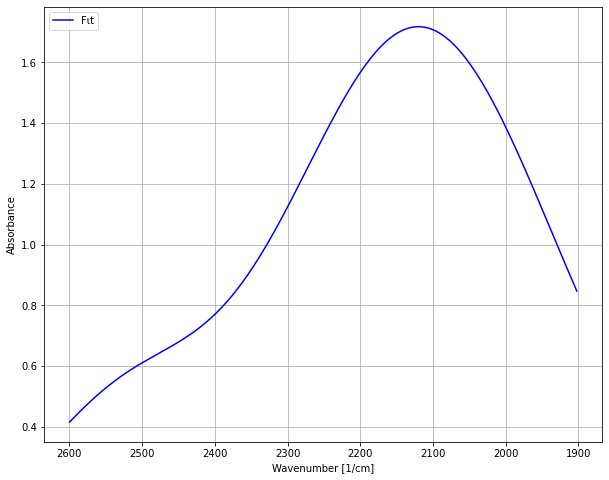

In [53]:
plot_one_fit(xtest,
            popt,
            figsize=(10,8),
            title=None,
            invert_xaxis=True,
            legend='Fιt',
            grid=True,
            marker=None,
            color='blue'
            )

Η `plot_all_fit` μπορεί να σχεδιάσει τις καμπύλη για όλες τις προσαρμογές της γκαουσιανής καμπύλης, για όλες τις διαφορετικές συγκεντρώσεις.

<AxesSubplot:title={'center':'All curve fit'}, xlabel='Wavenumber [1/cm]', ylabel='Absorbance'>

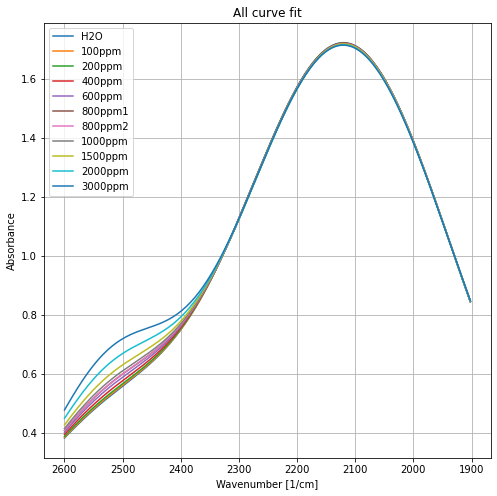

In [54]:
plot_all_fit(xtest1, 
             filenames,
             parameters_for_plot,
             title='All curve fit',
             invert_xaxis=True,
             grid=True,
                )

Η `check_residuals` ελέγχει την ποιότητα της προσαρμογής της γκαουσιανής καμπύλης, αφαιρώντας από το αποτέλεσμα της προσαρμογής τα αρχικά δεδομένα.

(<Figure size 720x576 with 2 Axes>,
 array([<AxesSubplot:xlabel='Wavenumber [1/cm]', ylabel='Absorbance'>,
        <AxesSubplot:xlabel='Wavenumber [1/cm]', ylabel='Residuals'>],
       dtype=object))

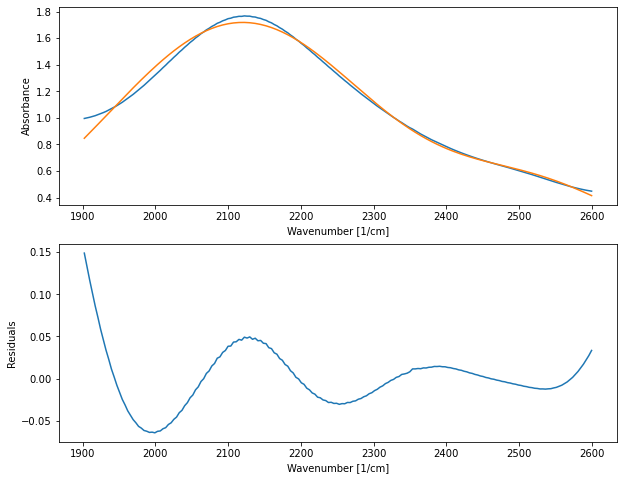

In [55]:
check_residuals(xtest, data1, popt)

In [58]:
dftest=show_residual_results(xtest, data1, popt)
dftest

,0
Wavenumber [1/cm],
1902.272651,0.148857
1906.002598,0.132840
1909.732544,0.116507
1913.462490,0.101568
1917.192437,0.086324
...,...
2584.852838,0.012748
2588.582784,0.017087
2592.312731,0.022188


Παρακάτω γίνεται η βαθμονόμηση του φασματοφωτομέτρου για τις θεωρητικές τιμές `target_concentrations` αλλά και αποτελέσματα `FTIR_concentrations` και απεικονίζονται σε κοινή γραφική παραστάση.

In [59]:
target_concentrations=[100, 100, 200, 400, 600, 800, 800, 1000, 1500, 2000, 3000]
FTIR_concentrations=[106.7, 213.2, 310.6, 520.1, 796.0, 1045.6, 1046.8, 1227.2, 1640.3, 2470.9, 3475.5]

Amplitude1_H2O=parameters_for_plot.loc['Amplitude1']
Amplitude2_HDO=parameters_for_plot.loc['Amplitude2']

ratios=[]
for (amp1, amp2) in zip(Amplitude1_H2O, Amplitude2_HDO):
    ratio=amp2/amp1
    ratios.append(ratio)

Text(0, 0.5, 'Measured concentration with FTIR')

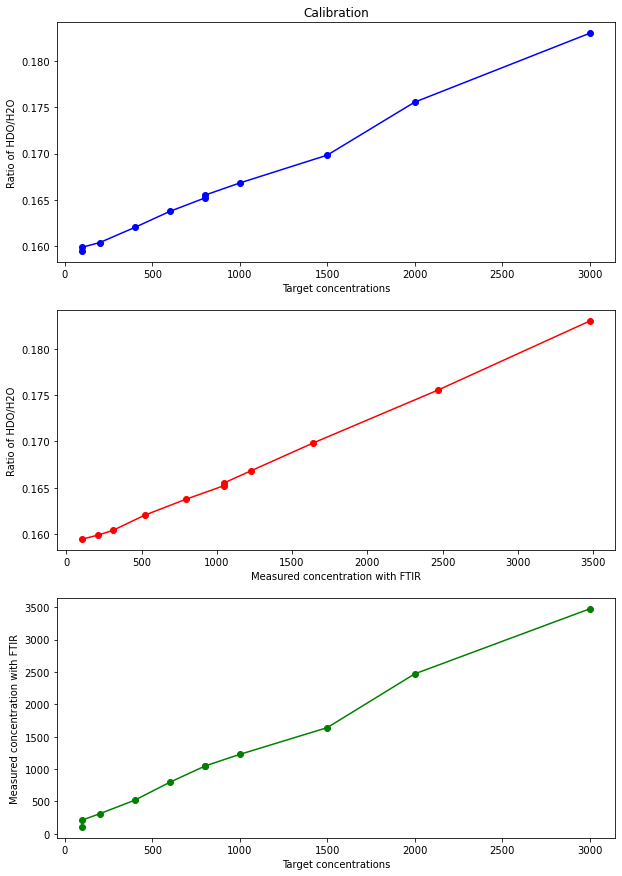

In [60]:
fig, ax=plt.subplots(3, figsize=(10,15))
ax[0].plot(target_concentrations, ratios, '-o', color='b')
ax[0].set_title('Calibration')
ax[0].set_xlabel('Target concentrations')
ax[0].set_ylabel('Ratio of HDO/H2O')
ax[1].plot(FTIR_concentrations, ratios, '-o', color='r')
ax[1].set_xlabel('Measured concentration with FTIR')
ax[1].set_ylabel('Ratio of HDO/H2O')
ax[2].plot(target_concentrations, FTIR_concentrations, '-o', color='g')
ax[2].set_xlabel('Target concentrations')
ax[2].set_ylabel('Measured concentration with FTIR')

Fit για τη γραφική παράσταση `FTIR_concentrations`-`ratios`.

Text(0, 0.5, 'Ratios of HDO/H2O')

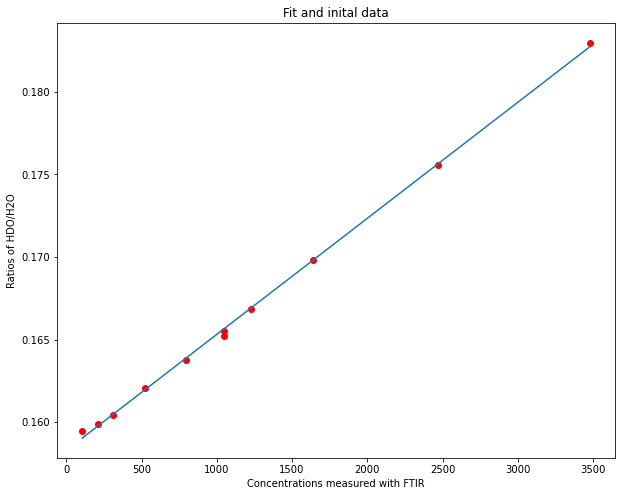

In [61]:
popt_line, pcov = curve_fit(line, FTIR_concentrations, ratios)


yline=line(np.array(FTIR_concentrations), *popt_line)
fig, ax=plt.subplots(figsize=(10,8))
ax.plot(FTIR_concentrations, yline)
ax.scatter(FTIR_concentrations, ratios, color='r')
ax.set_title('Fit and inital data')
ax.set_xlabel('Concentrations measured with FTIR')
ax.set_ylabel('Ratios of HDO/H2O')

Υπολογισμός του R^2.

In [62]:
y_average_value=(np.sum(ratios))/11
ss_tot=np.sum((ratios-y_average_value)**2)
ss_res=np.sum((ratios-yline)**2)

R_squared=1-(ss_res/ss_tot)
print(R_squared)

0.9990420464618288


Με τη `plot_all_fit_each_peak` γίνεται ο σχεδιασμός σε κοινή γραφική παράσταση 4 καμπυλών : αρχικά δεδομένα, προσαρμογή και αποτελέσματα της προσαρμογής για κάθε κορυφή ξεχωριστά. <br>
Εδώ επιλέγονται δύο τυχαία δείγματα, ένα των 1000ppm και ένα των 3000ppm.

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Original curve, fit and each peak'}, xlabel='Wavenumber [1/cm]', ylabel='Absorbance'>)

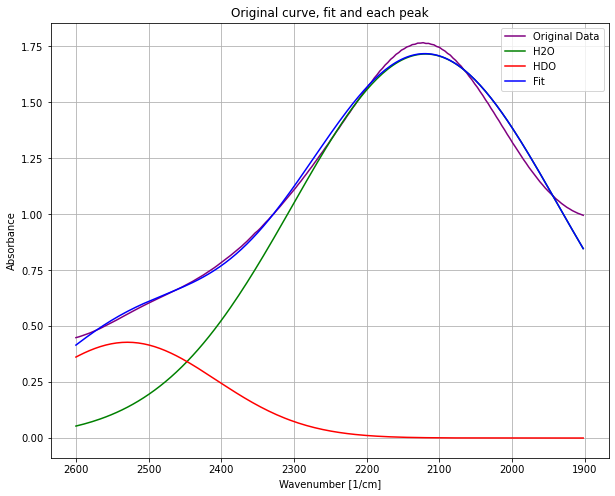

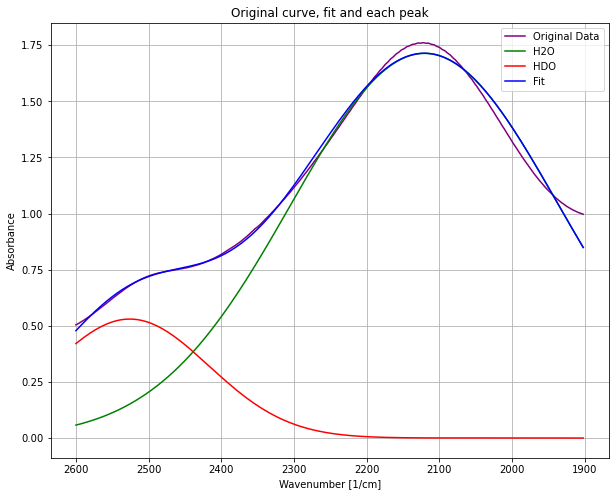

In [63]:
colors=['purple', 'green', 'red', 'blue']
plot_fit_each_peak('1000ppm', 
                       xtest, 
                       popt, 
                       data_df['1000ppm'],
                       title='Original curve, fit and each peak',
                       invert_xaxis=True,
                       legend=['Original Data', 'H2O', 'HDO', 'Fit'],
                       grid=True,
                       colors=colors,
                       xlabel='Wavenumber [1/cm]',
                       ylabel='Absorbance')

plot_fit_each_peak('3000ppm', 
                       xtest, 
                       list_all_parameters[10][0], 
                       data_df['3000ppm'],
                       title='Original curve, fit and each peak',
                       invert_xaxis=True,
                       legend=['Original Data', 'H2O', 'HDO', 'Fit'],
                       grid=True,
                       colors=colors,
                       xlabel='Wavenumber [1/cm]',
                       ylabel='Absorbance')

<h3>Lorentzian Fit</h3>

Διαχωρισμός των διαλυμάτων από 600ppm έως 3000ppm, διότι μπορούν να έχουν κοινά όρια, σε αντίθεση με τα προηγούμενα, που λόγω ευαισθησίας των παραμέτρων, τα όρια επιλέχθηκαν ξεχωριστά.

In [64]:
common_bounds_solutions=data_df.loc[:, '600ppm':'3000ppm']

Επιλογή `bounds` για κάθε περίπτωση:

In [65]:
common_bounds=(( 0, 2000, 0, 0, 2450, 0), ( 2, 2200, 230, 0.8, 2550, 1000))
bounds_for_H2O=(( 0, 2000, 0, 0, 2450, 0), ( 2, 2200, 230, 0.09, 2500, np.inf))
bounds_for_100ppm=(( 0, 2000, 0, 0, 2450, 0), ( 2, 2200, 230, 0.104, 2550, np.inf))
bounds_for_200ppm=(( 0, 2000, 0, 0, 2450, 0), ( 2, 2200, 230, 0.109, 2550, np.inf))
bounds_for_400ppm=(( 0, 2000, 0, 0, 2450, 0), ( 2, 2200, 230, 0.8, 2550, 1000))

Αρχικά γίνεται η προσαρμογή των δεδομένων με τη βοήθεια της `all_fit_distribution` και στη συνέχεια με τη χρήση της `all_fit_parameters` ομαδοποιούνται οι παράμετροι για τα διαλύματα που έχουν κοινά `bounds`.

In [66]:
common_bounds_parameters=all_fit_distribution(common_bounds_solutions, xtest, 1.7, 2100, 225, 0.4, 2500, 100, common_bounds,'lorentz')
common_bounds_parameters

[(array([1.72493650e+00, 2.12089176e+03, 2.25515521e+02, 1.30343409e-01,
         2.52175276e+03, 1.90731331e+02]),
  array([[ 4.51710790e-05,  3.99887905e-03,  5.19410027e-03,
          -1.87517589e-05, -6.19777583e-03, -1.81680578e-01],
         [ 3.99887905e-03,  6.47345166e-01,  8.70640617e-01,
          -3.25723711e-03,  1.21648212e+00, -1.84335598e+01],
         [ 5.19410027e-03,  8.70640617e-01,  2.47097924e+00,
          -7.73299619e-03,  2.96283292e+00, -3.13385096e+01],
         [-1.87517589e-05, -3.25723711e-03, -7.73299619e-03,
           3.44435149e-05, -9.15091239e-03,  9.20582028e-02],
         [-6.19777583e-03,  1.21648212e+00,  2.96283292e+00,
          -9.15091239e-03,  8.08050576e+01,  5.93086436e+01],
         [-1.81680578e-01, -1.84335598e+01, -3.13385096e+01,
           9.20582028e-02,  5.93086436e+01,  8.96366902e+02]])),
 (array([1.72496399e+00, 2.12097630e+03, 2.25592812e+02, 1.41196402e-01,
         2.52012119e+03, 1.72787015e+02]),
  array([[ 2.85926672e-05, 

In [67]:
common_bounds_parameters_df=all_fit_parameters(common_bounds_solutions, xtest, 1.7, 2100, 225, 0.4, 2500, 100, common_bounds, distribution='lorentz')
common_bounds_parameters_df

,600ppm,800ppm1,800ppm2,1000ppm,1500ppm,2000ppm,3000ppm
Substance1,H20,H20,H20,H20,H20,H20,H20
Amplitude1,1.72494,1.72496,1.72536,1.72571,1.72627,1.72306,1.72085
Center1,2120.89,2120.98,2120.92,2120.96,2121.03,2121.05,2120.96
FWHM1,225.516,225.593,225.642,225.824,226.047,226.352,226.704
Amplitude1 error,0.00672094,0.00534721,0.00535933,0.00460454,0.00388378,0.00330866,0.003104
Center1 error,0.804578,0.734227,0.734527,0.687655,0.632077,0.570509,0.537352
FWHM1 error,1.57193,1.47414,1.47502,1.413,1.34022,1.25743,1.21176
Substance2,HDO,HDO,HDO,HDO,HDO,HDO,HDO
Amplitude2,0.130343,0.141196,0.141822,0.15234,0.173524,0.216336,0.271345
Center2,2521.75,2520.12,2520.36,2519.38,2518.2,2516.77,2516.02


Έπειτα, γίνεται διαχωρισμός κάθε στήλης των μικρότερων διαλυμάτων για καλύτερη μελέτη των δεδομένων τους.

In [68]:
different_bounds_solutions=data_df.loc[:, 'H2O':'400ppm']
data_H2O=different_bounds_solutions['H2O']
data_100ppm=different_bounds_solutions['100ppm']
data_200ppm=different_bounds_solutions['200ppm']
data_400ppm=different_bounds_solutions['400ppm']

Χρήση της `fit_lorentzian` για κάθε ομάδα δεδομένων ξεχωριστά για τη βελτιστοποίηση του αποτελέσματος και ομαδοποίησή τους στη λίστα `parameters_different_bounds`

In [69]:
parameters_for_H2O=fit_lorentzian(data_H2O, xtest, 1.7, 2100, 225, 0.09, 2500, 3.*10**2, bounds_for_H2O)
parameters_for_100ppm=fit_lorentzian(data_100ppm, xtest, 1.7, 2100, 225, 0.104, 2500, 3.*10**2, bounds_for_100ppm)
parameters_for_200ppm=fit_lorentzian(data_200ppm, xtest, 1.7, 2100, 225, 0.109, 2500, 3.*10**2, bounds_for_200ppm)
parameters_for_400ppm=fit_lorentzian(data_400ppm, xtest, 1.7, 2100, 225, 0.119, 2500, 100, bounds_for_400ppm)

parameters_different_bounds=[parameters_for_H2O, parameters_for_100ppm, parameters_for_200ppm, parameters_for_400ppm]
parameters_different_bounds

[(array([1.72887874e+00, 2.12179139e+03, 2.26782328e+02, 9.00000000e-02,
         2.50000000e+03, 2.11467308e+02]),
  array([[ 9.73131456e-05,  8.16019072e-03,  1.12742264e-02,
          -5.25634726e-05,  5.74845052e-02, -4.90067657e-01],
         [ 8.16019072e-03,  1.01951237e+00,  1.40862580e+00,
          -6.62956921e-03,  8.77258042e+00, -4.19703322e+01],
         [ 1.12742264e-02,  1.40862580e+00,  3.34745899e+00,
          -1.32333931e-02,  1.50709561e+01, -6.58006685e+01],
         [-5.25634726e-05, -6.62956921e-03, -1.32333931e-02,
           6.39370685e-05, -6.72116439e-02,  2.67477855e-01],
         [ 5.74845052e-02,  8.77258042e+00,  1.50709561e+01,
          -6.72116439e-02,  2.28916393e+02, -1.97390570e+02],
         [-4.90067657e-01, -4.19703322e+01, -6.58006685e+01,
           2.67477855e-01, -1.97390570e+02,  2.77718594e+03]])),
 (array([1.71824786e+00, 2.12106422e+03, 2.25208872e+02, 1.04000000e-01,
         2.52965557e+03, 2.68494136e+02]),
  array([[ 2.94365819e-04, 

Συγκέντρωση των παραπάνω `popt` και `pcov` και στη συνέχεια δημιουργία ένος df αποκλειστικά με τα αποτελέσματα των διαλυμάτων που είχαν διαφορετικά bounds με όνομα `df_different_bounds`

In [70]:
all_popt=[]
all_pcov=[]

for optimal_parameters in parameters_different_bounds:
    popt=optimal_parameters[0]
    pcov=optimal_parameters[1]
    
    all_popt.append(popt)
    all_pcov.append(pcov)

In [71]:
list_different_bounds=[]
for (popt, pcov) in zip(all_popt, all_pcov):
    each_df=fit_parameters('', popt, pcov)
    list_different_bounds.append(each_df)

df_different_bounds=pd.concat(list_different_bounds, axis=1)
df_different_bounds.columns=['H2O', '100ppm', '200ppm', '400ppm']
df_different_bounds

,H2O,100ppm,200ppm,400ppm
Substance1,H20,H20,H20,H20
Amplitude1,1.72888,1.71825,1.72052,1.72295
Center1,2121.79,2121.06,2120.93,2120.83
FWHM1,226.782,225.209,225.191,225.232
Amplitude1 error,0.00986474,0.0171571,0.0139813,0.00981005
Center1 error,1.00971,1.1035,1.03829,0.923333
FWHM1 error,1.82961,2.16744,1.99183,1.75833
Substance2,HDO,HDO,HDO,HDO
Amplitude2,0.09,0.104,0.109,0.119019
Center2,2500,2529.66,2527.48,2524.32


Ομαδοποίηση όλων των αποτελεσμάτων για τη προσαρμογή των δεδομένων με τη χρήση λορεντζιανής κατανομής σε `dataframe`.

In [73]:
all_lorentzian_parameters_df=pd.concat([df_different_bounds, common_bounds_parameters_df], axis=1)
all_lorentzian_parameters_df

,H2O,100ppm,200ppm,400ppm,600ppm,800ppm1,800ppm2,1000ppm,1500ppm,2000ppm,3000ppm
Substance1,H20,H20,H20,H20,H20,H20,H20,H20,H20,H20,H20
Amplitude1,1.72888,1.71825,1.72052,1.72295,1.72494,1.72496,1.72536,1.72571,1.72627,1.72306,1.72085
Center1,2121.79,2121.06,2120.93,2120.83,2120.89,2120.98,2120.92,2120.96,2121.03,2121.05,2120.96
FWHM1,226.782,225.209,225.191,225.232,225.516,225.593,225.642,225.824,226.047,226.352,226.704
Amplitude1 error,0.00986474,0.0171571,0.0139813,0.00981005,0.00672094,0.00534721,0.00535933,0.00460454,0.00388378,0.00330866,0.003104
Center1 error,1.00971,1.1035,1.03829,0.923333,0.804578,0.734227,0.734527,0.687655,0.632077,0.570509,0.537352
FWHM1 error,1.82961,2.16744,1.99183,1.75833,1.57193,1.47414,1.47502,1.413,1.34022,1.25743,1.21176
Substance2,HDO,HDO,HDO,HDO,HDO,HDO,HDO,HDO,HDO,HDO,HDO
Amplitude2,0.09,0.104,0.109,0.119019,0.130343,0.141196,0.141822,0.15234,0.173524,0.216336,0.271345
Center2,2500,2529.66,2527.48,2524.32,2521.75,2520.12,2520.36,2519.38,2518.2,2516.77,2516.02


Προσθήκη όλων των παραμέτρων σε μία λίστα με όνομα `list_all_parameters_lorentzian` με σκοπό την εύκολη διαχείρισή τους στα επόμενα βήματα.

In [74]:
list_all_parameters_lorentzian=parameters_different_bounds + common_bounds_parameters 
list_all_parameters_lorentzian

[(array([1.72887874e+00, 2.12179139e+03, 2.26782328e+02, 9.00000000e-02,
         2.50000000e+03, 2.11467308e+02]),
  array([[ 9.73131456e-05,  8.16019072e-03,  1.12742264e-02,
          -5.25634726e-05,  5.74845052e-02, -4.90067657e-01],
         [ 8.16019072e-03,  1.01951237e+00,  1.40862580e+00,
          -6.62956921e-03,  8.77258042e+00, -4.19703322e+01],
         [ 1.12742264e-02,  1.40862580e+00,  3.34745899e+00,
          -1.32333931e-02,  1.50709561e+01, -6.58006685e+01],
         [-5.25634726e-05, -6.62956921e-03, -1.32333931e-02,
           6.39370685e-05, -6.72116439e-02,  2.67477855e-01],
         [ 5.74845052e-02,  8.77258042e+00,  1.50709561e+01,
          -6.72116439e-02,  2.28916393e+02, -1.97390570e+02],
         [-4.90067657e-01, -4.19703322e+01, -6.58006685e+01,
           2.67477855e-01, -1.97390570e+02,  2.77718594e+03]])),
 (array([1.71824786e+00, 2.12106422e+03, 2.25208872e+02, 1.04000000e-01,
         2.52965557e+03, 2.68494136e+02]),
  array([[ 2.94365819e-04, 

Παράδειγμα χρήσης της `first_peak_results` για λορεντζιανή κατανομή, έχοντας ως παράδειγμα το διάλυμα των 1000ppm, με την πρώτη κορυφή να είναι αυτή του H2O.

In [76]:
popt_1000ppm=list_all_parameters_lorentzian[7][0]
first_peak_results('1000ppm', xtest, popt_1000ppm, distribution='lorentz')

,"1000ppm, H2O"
0,0.890537
1,0.905355
2,0.920408
3,0.935692
4,0.951206
...,...
183,0.330610
184,0.326351
185,0.322166
186,0.318056


Παράδειγμα χρήσης της `second_peak_results` για λορεντζιανή κατανομή, έχοντας ως παράδειγμα το διάλυμα των 1000ppm, με τη δεύτερη κορυφή να είναι αυτή του HDO.

In [77]:
second_peak_results('1000ppm', xtest, popt_1000ppm, distribution='lorentz')

,"1000ppm, HDO"
0,0.009663
1,0.009773
2,0.009885
3,0.009999
4,0.010115
...,...
183,0.130625
184,0.128479
185,0.126290
186,0.124064


Παρακάτω η `all_first_peak_results` θα ομαδοποιήσει σε ένα dataframe όλα τα αποτελέσματα των λορεντζιανών κατανομών για την πρώτη κορυφή, το Η2Ο.

In [78]:
all_first_peak_results(filenames, xtest, list_all_parameters_lorentzian, distribution='lorentz')

,H2O,100ppm,200ppm,400ppm,600ppm,800ppm1,800ppm2,1000ppm,1500ppm,2000ppm,3000ppm
0,0.892570,0.883953,0.885572,0.887374,0.889246,0.889222,0.889831,0.890537,0.891438,0.890843,0.891372
1,0.907358,0.898705,0.900351,0.902180,0.904064,0.904035,0.904650,0.905355,0.906256,0.905630,0.906144
2,0.922379,0.913690,0.915365,0.917221,0.919117,0.919082,0.919703,0.920408,0.921308,0.920650,0.921147
3,0.937631,0.928908,0.930611,0.932495,0.934402,0.934361,0.934989,0.935692,0.936591,0.935900,0.936379
4,0.953111,0.944357,0.946089,0.948000,0.949918,0.949871,0.950505,0.951206,0.952104,0.951379,0.951838
...,...,...,...,...,...,...,...,...,...,...,...
183,0.334454,0.327847,0.328087,0.328533,0.329650,0.329935,0.330065,0.330610,0.331317,0.331453,0.331758
184,0.330147,0.323618,0.323855,0.324297,0.325401,0.325683,0.325812,0.326351,0.327050,0.327185,0.327490
185,0.325916,0.319464,0.319699,0.320136,0.321227,0.321505,0.321633,0.322166,0.322858,0.322994,0.323297
186,0.321760,0.315383,0.315616,0.316048,0.317127,0.317402,0.317529,0.318056,0.318740,0.318876,0.319179


Παρακάτω η `all_second_peak_results` θα ομαδοποιήσει σε ένα dataframe όλα τα αποτελέσματα των λορεντζιανών κατανομών για την δεύτερη κορυφή, το ΗDΟ.

In [79]:
all_second_peak_results(filenames, xtest, list_all_parameters_lorentzian, distribution='lorentz')

,H2O,100ppm,200ppm,400ppm,600ppm,800ppm1,800ppm2,1000ppm,1500ppm,2000ppm,3000ppm
0,0.010012,0.016099,0.015060,0.013305,0.011286,0.010242,0.010308,0.009663,0.009113,0.008726,0.009021
1,0.010124,0.016262,0.015216,0.013448,0.011411,0.010357,0.010424,0.009773,0.009219,0.008828,0.009128
2,0.010237,0.016427,0.015374,0.013593,0.011538,0.010475,0.010542,0.009885,0.009326,0.008933,0.009237
3,0.010353,0.016595,0.015535,0.013740,0.011668,0.010595,0.010662,0.009999,0.009435,0.009039,0.009348
4,0.010470,0.016765,0.015698,0.013890,0.011799,0.010716,0.010785,0.010115,0.009546,0.009147,0.009461
...,...,...,...,...,...,...,...,...,...,...,...
183,0.077519,0.099783,0.103561,0.110691,0.117485,0.123819,0.124523,0.130625,0.143259,0.167435,0.198683
184,0.076565,0.099221,0.102872,0.109716,0.116091,0.122038,0.122741,0.128479,0.140441,0.163280,0.192932
185,0.075595,0.098629,0.102149,0.108701,0.114652,0.120212,0.120914,0.126290,0.137587,0.159121,0.187226
186,0.074610,0.098008,0.101395,0.107648,0.113174,0.118347,0.119047,0.124064,0.134708,0.154973,0.181587


Η `plot_one_fit` μπορεί να σχεδιάσει την καμπύλη για μια μόνο προσαρμογή της λορεντζιανής καμπύλης, στη συγκεκριμένη περίπτωση για το διάλυμα των 1000ppm.

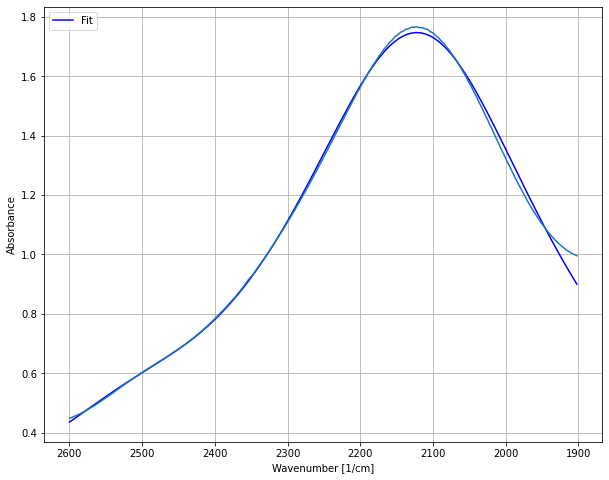

In [80]:
plot_one_fit(xtest,
            list_all_parameters_lorentzian[7][0],
            figsize=(10,8),
            distribution='lorentz',
            title=None,
            invert_xaxis=True,
            legend='Fit',
            grid=True,
            marker=None,
            color='blue'
            )
data_original_1000ppm=data_df['1000ppm']
plt.plot(xtest, data_original_1000ppm)

Η `plot_all_fit` μπορεί να σχεδιάσει τις καμπύλη για όλες τις προσαρμογές της λορεντζιανής καμπύλης, για όλες τις διαφορετικές συγκεντρώσεις.

<AxesSubplot:title={'center':'All curve fit'}, xlabel='Wavenumber [1/cm]', ylabel='Absorbance'>

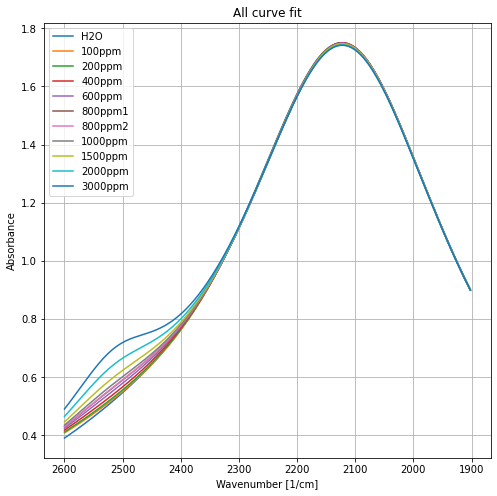

In [81]:
plot_all_fit(xtest, 
             filenames,
             all_lorentzian_parameters_df,
             distribution='lorentz',
             title='All curve fit',
             invert_xaxis=True,
             grid=True
                )

Η `check_residuals` ελέγχει την ποιότητα της προσαρμογής της λορεντζιανής καμπύλης, αφαιρώντας από το αποτέλεσμα της προσαρμογής τα αρχικά δεδομένα.

(<Figure size 720x576 with 2 Axes>,
 array([<AxesSubplot:xlabel='Wavenumber [1/cm]', ylabel='Absorbance'>,
        <AxesSubplot:xlabel='Wavenumber [1/cm]', ylabel='Residuals'>],
       dtype=object))

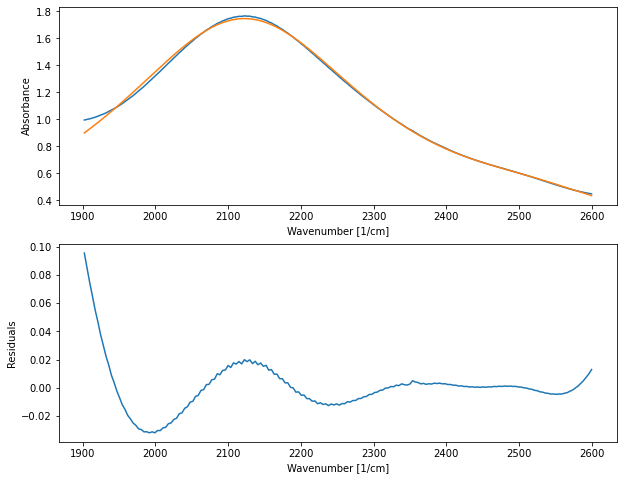

In [82]:
check_residuals(xtest, data_original_1000ppm, list_all_parameters_lorentzian[7][0], distribution='lorentz')

Παρακάτω γίνεται η βαθμονόμηση του φασματοφωτομέτρου για τις θεωρητικές τιμές `target_concentrations` αλλά και αποτελέσματα `FTIR_concentrations` και απεικονίζονται σε κοινή γραφική παραστάση.

In [83]:
target_concentrations=[100, 100, 200, 400, 600, 800, 800, 1000, 1500, 2000, 3000]
FTIR_concentrations=[106.7, 213.2, 310.6, 520.1, 796.0, 1045.6, 1046.8, 1227.2, 1640.3, 2470.9, 3475.5]

Amplitude1_H2O_lorentzian=all_lorentzian_parameters_df.loc['Amplitude1']
Amplitude2_HDO_lorentzian=all_lorentzian_parameters_df.loc['Amplitude2']

ratios_lorentzian=[]
for (amp1, amp2) in zip(Amplitude1_H2O_lorentzian, Amplitude2_HDO_lorentzian):
    ratio=amp2/amp1
    ratios_lorentzian.append(ratio)

Text(0, 0.5, 'Measured concentration with FTIR')

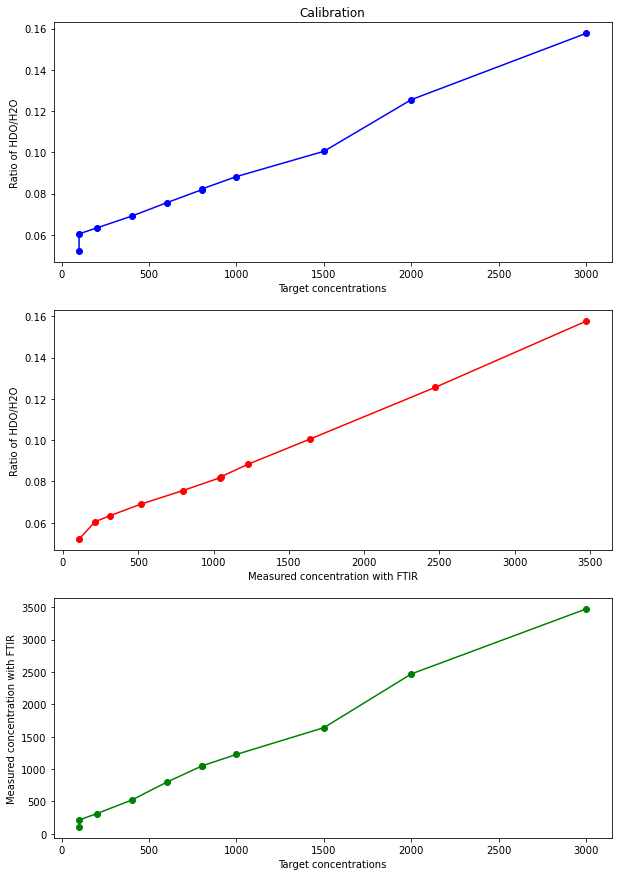

In [84]:
fig, ax=plt.subplots(3, figsize=(10,15))
ax[0].plot(target_concentrations, ratios_lorentzian, '-o', color='b')
ax[0].set_title('Calibration')
ax[0].set_xlabel('Target concentrations')
ax[0].set_ylabel('Ratio of HDO/H2O')
ax[1].plot(FTIR_concentrations, ratios_lorentzian, '-o', color='r')
ax[1].set_xlabel('Measured concentration with FTIR')
ax[1].set_ylabel('Ratio of HDO/H2O')
ax[2].plot(target_concentrations, FTIR_concentrations, '-o', color='g')
ax[2].set_xlabel('Target concentrations')
ax[2].set_ylabel('Measured concentration with FTIR')

Fit για τη γραφική παράσταση `FTIR_concentrations`-`ratios`.

Text(0, 0.5, 'Ratios of HDO/H2O')

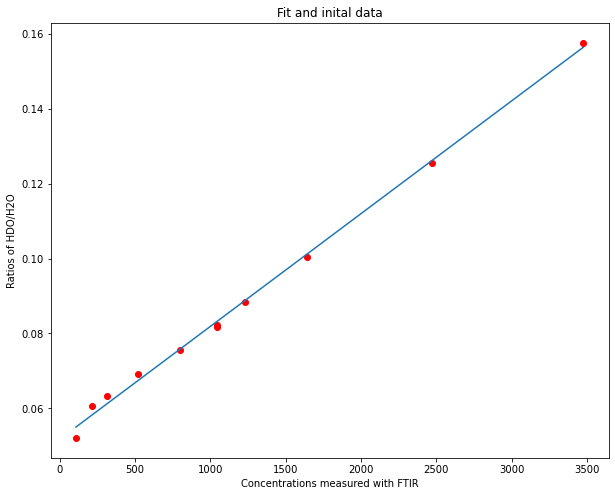

In [85]:
popt_line_lor, pcov_line_lor = curve_fit(line, FTIR_concentrations, ratios_lorentzian)


yline_lor=line(np.array(FTIR_concentrations), *popt_line_lor)

fig, ax=plt.subplots(figsize=(10,8))
ax.plot(FTIR_concentrations, yline_lor)
ax.scatter(FTIR_concentrations, ratios_lorentzian, color='r')
ax.set_title('Fit and inital data')
ax.set_xlabel('Concentrations measured with FTIR')
ax.set_ylabel('Ratios of HDO/H2O')

Υπολογισμός του R^2.

In [86]:
y_average_value_lor=(np.sum(ratios_lorentzian))/11
ss_tot_lor=np.sum((ratios_lorentzian-y_average_value_lor)**2)
ss_res_lor=np.sum((ratios_lorentzian-yline_lor)**2)

R_squared_lor=1-(ss_res_lor/ss_tot_lor)
print(R_squared_lor)

0.9971530591173512


Με τη `plot_all_fit_each_peak` γίνεται ο σχεδιασμός σε κοινή γραφική παράσταση 4 καμπυλών : αρχικά δεδομένα, προσαρμογή και αποτελέσματα της προσαρμογής για κάθε κορυφή ξεχωριστά. <br>
Εδώ επιλέγονται τρία τυχαία δείγματα, του Η2Ο, των 1000ppm και των 3000ppm.

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Original curve, fit and each peak'}, xlabel='Wavenumber [1/cm]', ylabel='Absorbance'>)

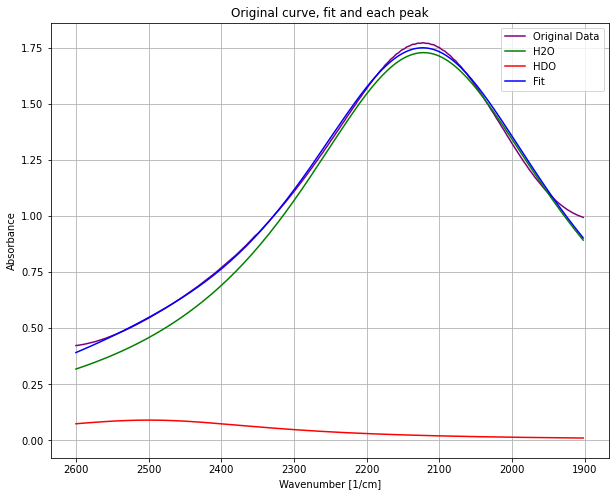

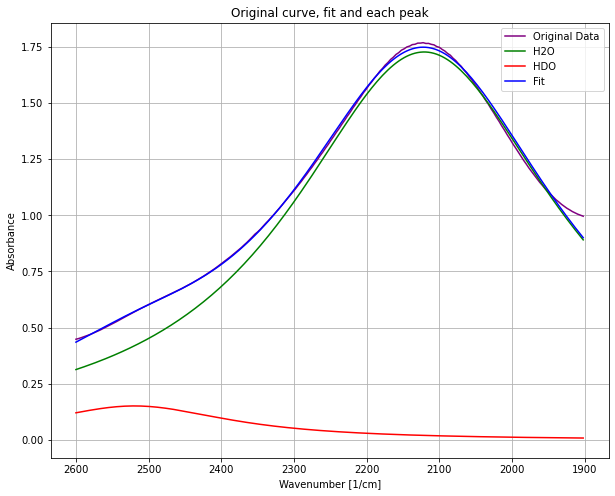

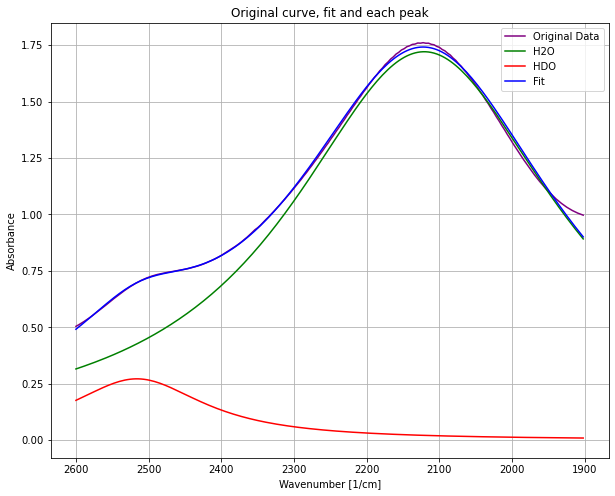

In [87]:
colors=['purple', 'green', 'red', 'blue']
plot_fit_each_peak('H2O', 
                    xtest, 
                    list_all_parameters_lorentzian[0][0], 
                    data_df['H2O'],
                    distribution='lorentz',
                    title='Original curve, fit and each peak',
                    invert_xaxis=True,
                    legend=['Original Data', 'H2O', 'HDO', 'Fit'],
                    grid=True,
                    colors=colors,
                    xlabel='Wavenumber [1/cm]',
                    ylabel='Absorbance')

plot_fit_each_peak('1000ppm', 
                    xtest, 
                    list_all_parameters_lorentzian[7][0], 
                    data_df['1000ppm'],
                    distribution='lorentz',
                    title='Original curve, fit and each peak',
                    invert_xaxis=True,
                    legend=['Original Data', 'H2O', 'HDO', 'Fit'],
                    grid=True,
                    colors=colors,
                    xlabel='Wavenumber [1/cm]',
                    ylabel='Absorbance')

plot_fit_each_peak('3000ppm', 
                    xtest, 
                    list_all_parameters_lorentzian[10][0], 
                    data_df['3000ppm'],
                    distribution='lorentz',
                    title='Original curve, fit and each peak',
                    invert_xaxis=True,
                    legend=['Original Data', 'H2O', 'HDO', 'Fit'],
                    grid=True,
                    colors=colors,
                    xlabel='Wavenumber [1/cm]',
                    ylabel='Absorbance')